<a href="https://colab.research.google.com/github/PierfrancescoElia/AICyberLabs/blob/main/Lab01/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Introduction to Deep Learning

| Member | ID |
| -- | -- |
| Alessandro Meneghini| s332228 |
| Pierfrancesco Elia | s331497 |
| Ankesh Porwal | s328746 |


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset
import time


## Task 1: Data Preprocessing

In this step, we analyze the dataset to ensure effective preprocessing and start with a clean, functional dataset. We identify NaN and Inf values, which we decide to remove. Additionally, we find certain features that are mostly zero, except for a few cases, making them irrelevant for our analysis.

Steps Performed:
- Removed duplicate entries;
- Identified and removed NaN values;
- Identified and removed Inf values;
- Data Visualization;
- Evaluated features with minimal variation and removed those deemed irrelevant;
- Dataset splitting;
- Standardization.


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# import the dataset
dataset_url = 'https://raw.githubusercontent.com/PierfrancescoElia/AICyberLabs/refs/heads/main/Lab01/dataset_lab_1.csv'
df = pd.read_csv(dataset_url)

df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


20 columns of DoS Hulk are empty, we will drop them


In [4]:
# removing duplicate entries
df = df.drop_duplicates()

# checking NaN values to decide if delete them or maybe popolate with zero
display(df[df.isna().any(axis=1)])

# we decided to drop rows with NaN values
df = df.dropna()

# checking inf entries
display(df[df.isin([np.inf,-np.inf]).any(axis=1)])

# substituting +inf and -inf with NaN, then deleting
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
2130,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,52606,Benign
16361,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,19152,Benign
20043,0,0.0,0,0.0,0,NaN,0,0,0.0,0.0,0.0,0,2,inf,2,80,DoS Hulk


,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
6683,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64231,Benign
9265,0,0.0,1,0.0,0,inf,0,1,7.0,0.0,9.333333,14,2,inf,2,47542,Benign
10138,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,17774,Benign
11793,0,0.0,0,0.0,0,inf,0,0,6.0,0.0,6.000000,6,2,inf,2,21,Benign
14833,0,0.0,0,2.0,2,inf,1,0,6.0,0.0,4.666666,6,1,inf,1,64299,Benign
15627,0,0.0,0,6.0,6,inf,1,0,6.0,0.0,6.000000,6,1,inf,1,443,Benign
29324,0,0.0,0,6.0,6,inf,1,0,0.0,0.0,2.000000,0,1,inf,1,1026,PortScan


<ipython-input-4-4ad36bd84621>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], np.nan, inplace=True)


### Data Visualization

<ipython-input-5-0e67bb9ffc87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label_column] = df[label_column].astype(str)  # Cast to string to prevent issues


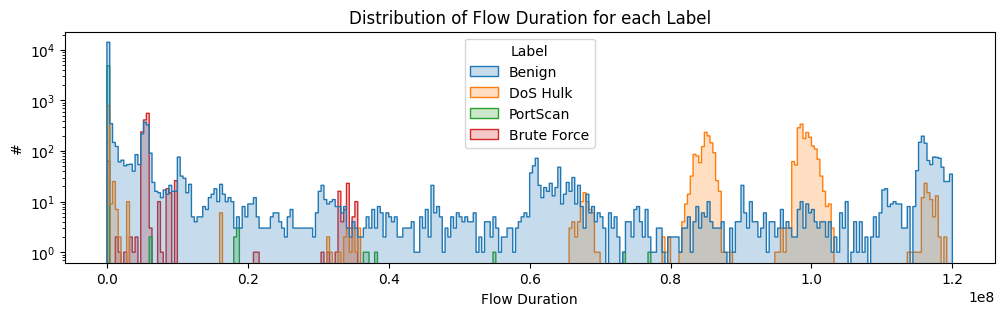

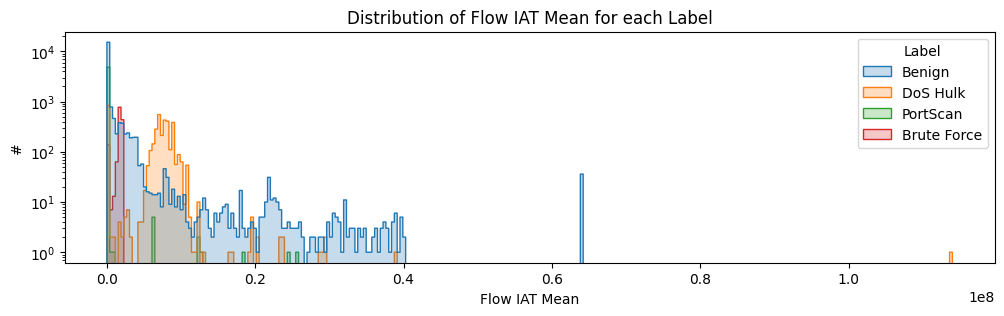

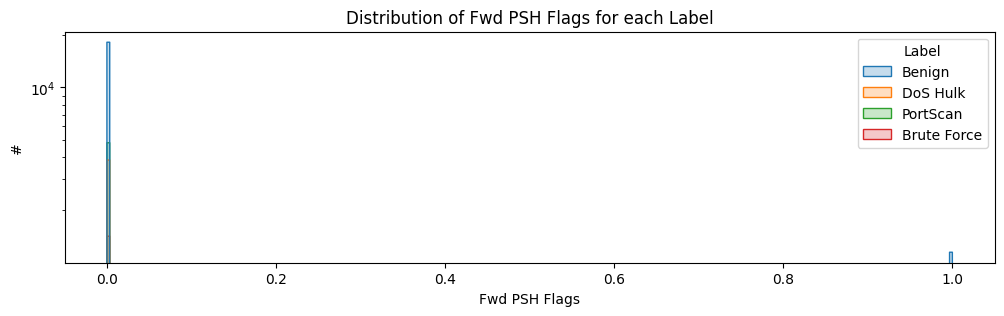

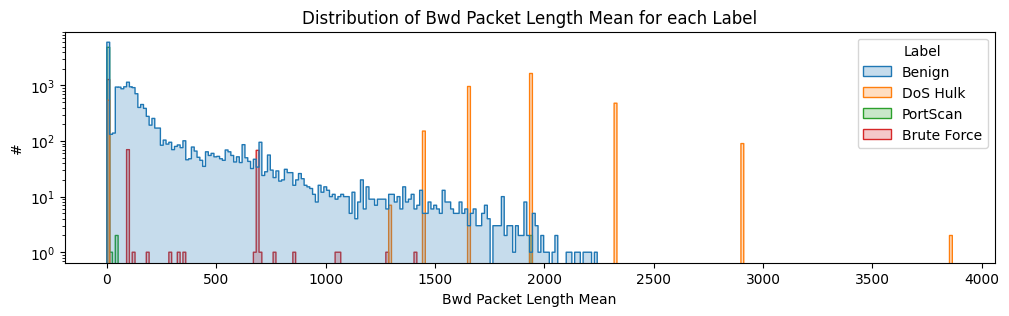

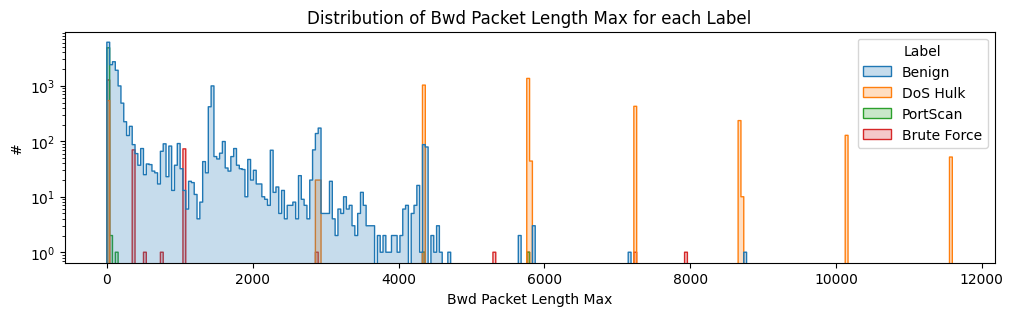

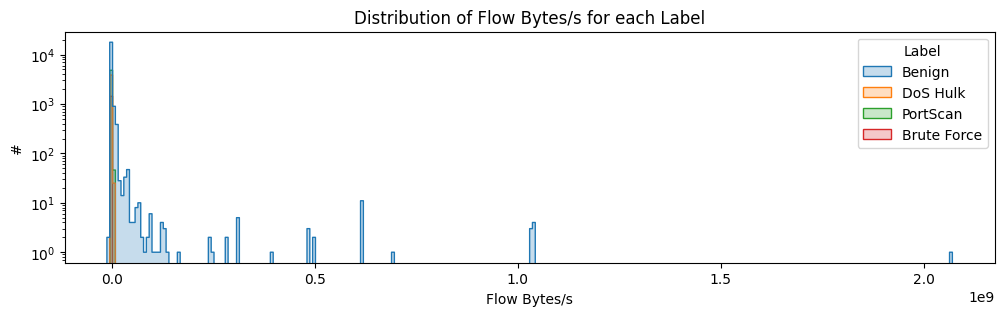

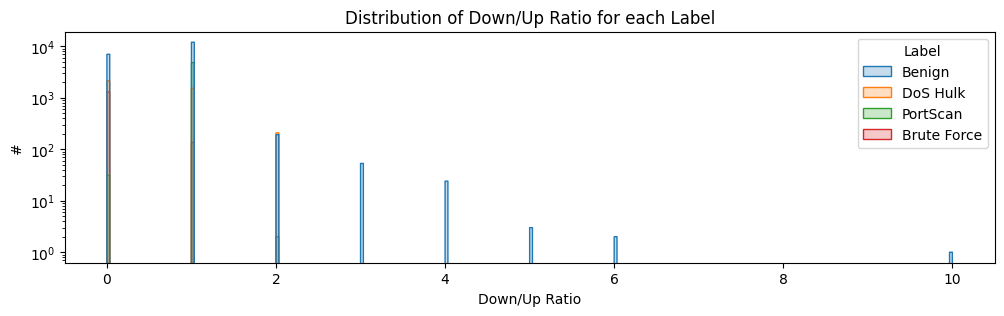

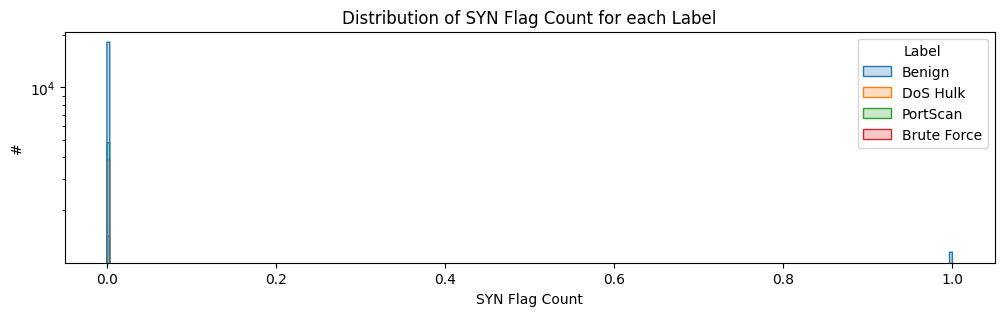

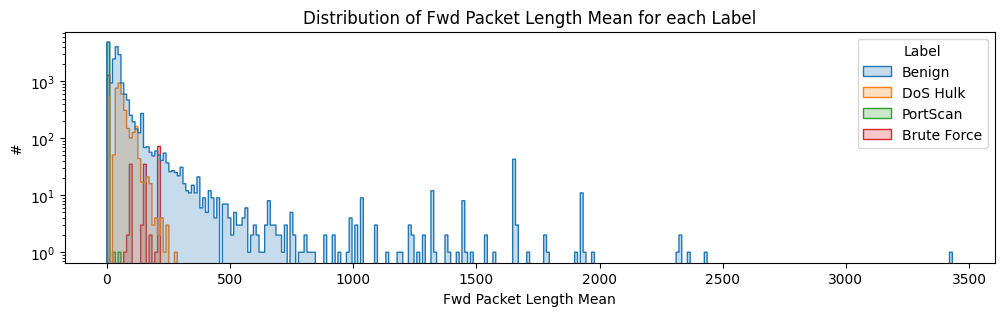

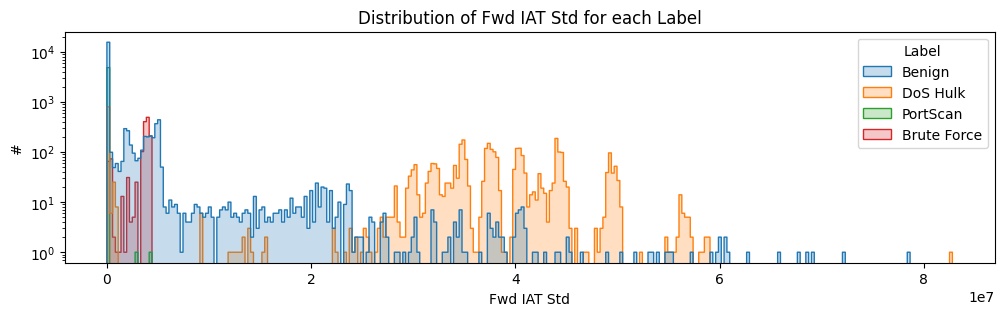

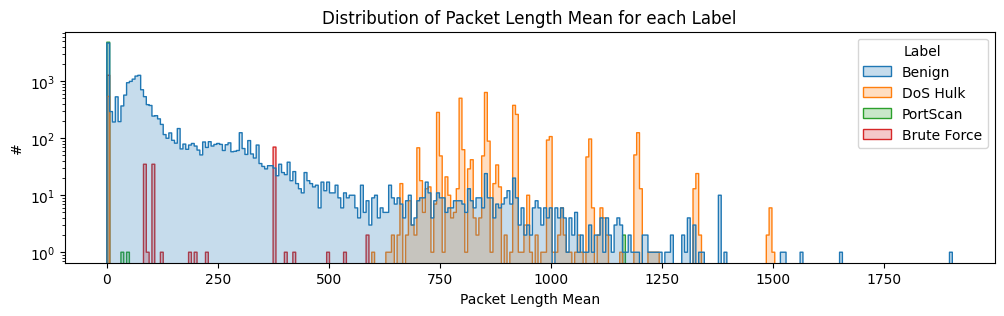

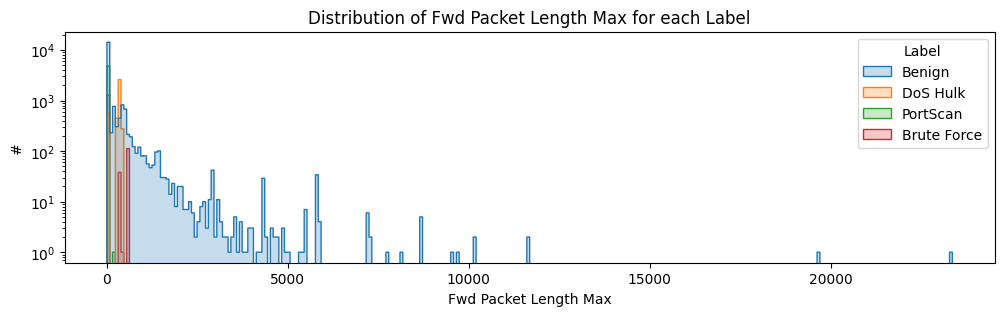

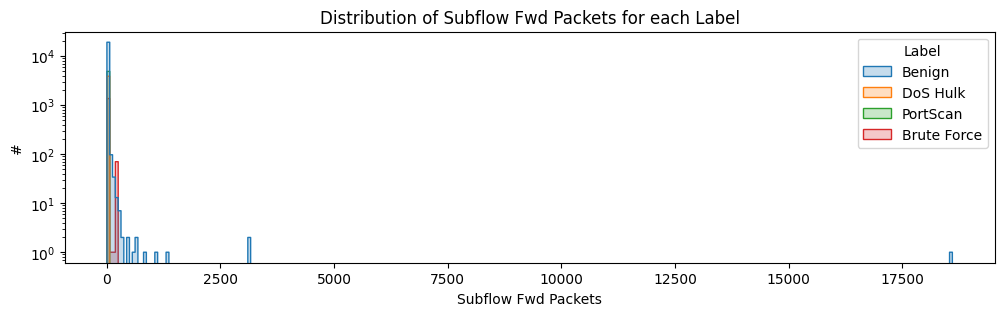

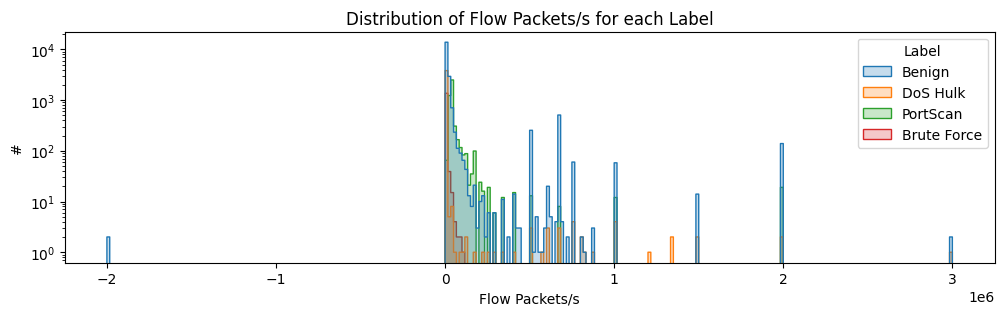

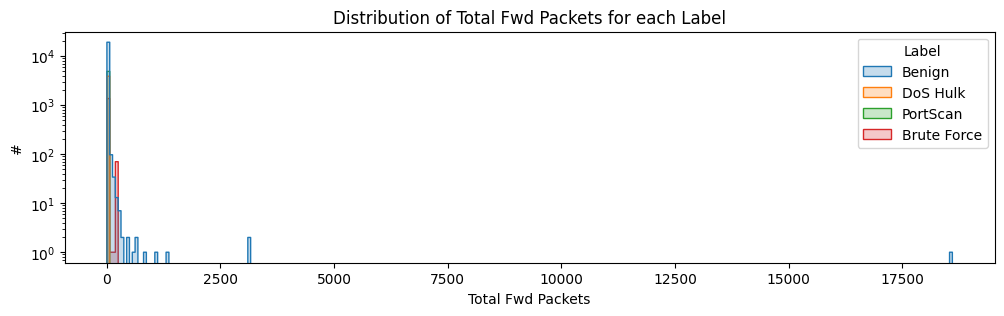

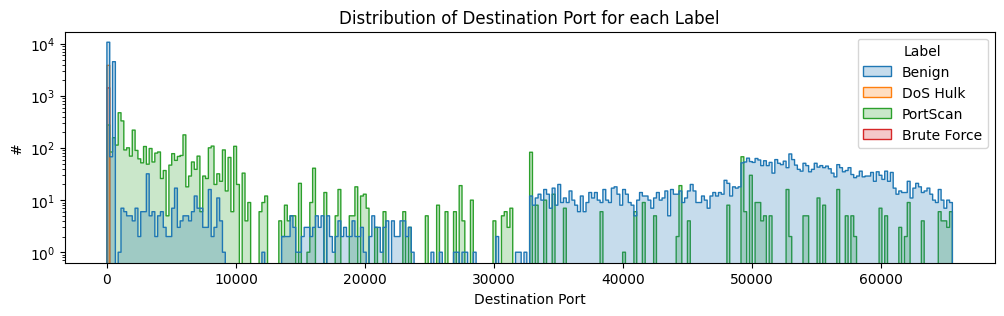

In [5]:
label_column = df.columns[-1]  # Get the last column (assumed to be categorical labels)

# Ensure the label column is categorical for proper hue handling
df[label_column] = df[label_column].astype(str)  # Cast to string to prevent issues

for column in df.columns[:-1]:  # Iterate over all columns except the last one
    plt.figure(figsize=(12, 3))
    ax = sns.histplot(
        data=df,
        x=column,
        hue=label_column,  # Dynamically set the hue based on last column
        element="step",
        common_norm=False,
        multiple="layer",
        bins=300,
        legend=True
    )

    # Manually fetch the legend handles and labels
    handles, labels = ax.get_legend_handles_labels()

    if labels:  # Only add legend if labels exist
        plt.legend(handles=handles, labels=labels, title=label_column)

    plt.yscale("log")
    plt.title(f'Distribution of {column} for each {label_column}')
    plt.xlabel(column)
    plt.ylabel('#')
    plt.show()

We see when features `Fwd PSH Flags` and `SYN Flag Count` are `1`, the row is always labeled as Bening, these are not features that are usefull to classify attacks and for this reason they are dropped.

In [6]:
df.drop('SYN Flag Count', axis=1, inplace=True)
df.drop('Fwd PSH Flags', axis=1, inplace=True)

In [7]:
# Encode labels
label_encoder = LabelEncoder()
labels = df['Label']
df['Label'] = label_encoder.fit_transform(labels)

label_mapping = {class_label: index for index, class_label in enumerate(label_encoder.classes_)}
print(label_mapping)


{'Benign': 0, 'Brute Force': 1, 'DoS Hulk': 2, 'PortScan': 3}


### Dataset Splitting

   - **Training Set** → 60%
   - **Validation Set** → 20%
   - **Test Set** → 20%

In [8]:
X = df[df.columns[:-1]].values
y = df['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (17631, 14)
Validation set: (5877, 14)
Test set: (5878, 14)


### Standardization

#### How do you preprocess the data? Is the preprocessing the same as for the training partition?

When preprocessing the test partition of a dataset, the steps should generally align with preprocessing applied to training partition in order to ensure consistency. However, the test partition should not influence the preprocessing parameters determined during the training stage (e.g., mean, standard deviation, or min/max values). For this reason we `.fit_transform()` only on the `X_Train` set and apply the scaler with `transform()` on `X_val` and `X_test`.



### Standardization
We standardize the dataset to avoid that some features dominate on the others. Standardizing the features ensures that all input variables have a mean of 0 and a standard deviation of 1, which improves model convergence and prevents certain features from dominating due to scale differences.

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Task 2: Shallow Neural Network

| **Hyperparameter**         | **Value**                                      |
|----------------------------|-----------------------------------------------|
| Layers                     | 1                                             |
| Neurons per Layer          | {32, 64, 128}                                 |
| Activation                 | Linear                                        |
| Weight Initialization      | Default                                       |
| Batch Size                 | 64                                            |
| Loss Function              | Cross-Entropy                                 |
| Optimizer                  | AdamW                                         |
| Learning Rate              | 0.0005                                        |
| Epochs & Early Stopping    | 100 or shorter based on the designed criteria |
| Regularization             | None                                          |

Answer the following questions.

- Describe how you carried out the training process.
- How does the loss curve evolve during training on the training and validation set?
- How do you select the best model across epochs? Which model do you use for validation
and test?
- What is the overall classification performance in the validation and test datasets and
considering the different classes? Indicate the results.
- Why is the performance of the model so poor?

Change the model with the best performance (optimal number of neurons) by changing the
activation function in ReLU and evaluate the effects.

In [10]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [11]:
class SingleLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayerNN, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  # Single layer with 64 neurons

    def forward(self, x):
        return self.linear(x)  # Linear activation (default)

In [12]:
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))
model = SingleLayerNN(input_size, output_size)

In [13]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)


In [15]:
# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
# Training loop with early stopping
def training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch, patience):
    num_epochs = num_epoch
    patience = patience  # Early stopping patience
    best_model_state_dict = model.state_dict()
    best_val_loss = float('inf')
    patience_counter = 0

    train_losses = []
    val_losses = []

    start_time = time.time()

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()

        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation phase
        model.eval()
        epoch_val_loss = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                epoch_val_loss += loss.item()

        val_losses.append(epoch_val_loss / len(val_loader))

        # print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')


        # Early stopping check
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state_dict = model.state_dict()  # Save best model state
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Training completed in {elapsed_time:.2f} seconds.")

    # Load the best model state before returning
    model.load_state_dict(best_model_state_dict)

    # Plot training and validation losses
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    # plt.yscale('log')
    plt.legend()
    plt.show()
    return model, train_losses, val_losses # Return the trained model and losses



In [17]:
def testing_model(model, dataloader, device):
    """
    Evaluate the model on a given dataloader and compute accuracy.

    Args:
        model: The trained model.
        dataloader: DataLoader for the dataset.
        device: Device to run the model on (CPU or GPU).

    Returns:
        float: Accuracy of the model on the test dataset.
    """
    # Record the start time
    start_time = time.time()

    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient computation for efficiency
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move batch to GPU
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the class with highest score
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions) * 100

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    return accuracy, all_labels, all_predictions

Epoch 10/100, Train Loss: 0.5689, Val Loss: 0.5457
Epoch 20/100, Train Loss: 0.4652, Val Loss: 0.4445
Epoch 30/100, Train Loss: 0.4269, Val Loss: 0.4056
Epoch 40/100, Train Loss: 0.4067, Val Loss: 0.3848
Epoch 50/100, Train Loss: 0.3947, Val Loss: 0.3717
Epoch 60/100, Train Loss: 0.3853, Val Loss: 0.3627
Epoch 70/100, Train Loss: 0.3793, Val Loss: 0.3561
Epoch 80/100, Train Loss: 0.3746, Val Loss: 0.3509
Epoch 90/100, Train Loss: 0.3700, Val Loss: 0.3468
Epoch 100/100, Train Loss: 0.3662, Val Loss: 0.3434
Training completed in 49.15 seconds.


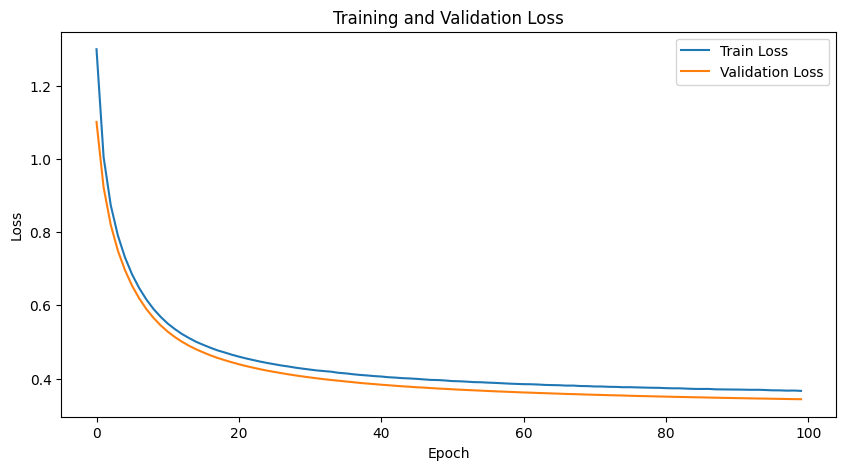

In [18]:
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 100, patience = 20)

In [19]:
# 2. Then evaluate the trained model
train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

# 3. Finally print the results
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Train report")
print(classification_report(train_labels, train_preds))
print("Val report")
print(classification_report(val_labels, val_preds))
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.3512 seconds to execute.
The function took 0.1270 seconds to execute.
The function took 0.1090 seconds to execute.
Train Accuracy: 87.8339
Validation Accuracy: 88.1913
Test Accuracy: 88.7207
Train report
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     11515
           1       0.00      0.00      0.00       866
           2       0.97      0.84      0.90      2292
           3       0.81      0.88      0.85      2958

    accuracy                           0.88     17631
   macro avg       0.67      0.67      0.67     17631
weighted avg       0.84      0.88      0.86     17631

Val report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3900
           1       0.00      0.00      0.00       286
           2       0.98      0.86      0.92       776
           3       0.81      0.88      0.84       915

    accuracy                           0.88      5877
   m

#### Questions

- **Describe how you carried out the training process.**

The model was trained using a single-layer neural network (SingleLayerNN) implemented in PyTorch. The data was loaded into mini-batches of size 64 using DataLoader. The loss function used was cross-entropy, and the optimizer was AdamW with a learning rate of 0.0005. Early stopping was implemented with a patience of 10 epochs, and the model with the lowest validation loss was saved and restored.

- **How does the loss curve evolve during training on the training and validation set?**

During training, both the training and validation loss generally decreased over epochs, but the improvement plateaued after a certain point. The model stopped training early based on the early stopping criterion to avoid overfitting. A plot of training and validation loss was shown to visualize the evolution of losses across epochs.

- **How do you select the best model across epochs? Which model do you use for validation and test?**

The best model was selected using early stopping, by monitoring the validation loss after each epoch. The model state (weights) corresponding to the lowest validation loss was saved. This best-performing model was then used for both validation and test evaluations.

- **What is the overall classification performance in the validation and test datasets and considering the different classes? Indicate the results.**

See the Train Accuracy, Validation Accuracy and Test Accuracy above.For per-class performance we added precision, recall, f1-score and support report

- **Why is the performance of the model so poor?**

The poor performance can be attributed to:

1. The use of linear activation, which limits the model's capacity to learn nonlinear patterns in the data.
2. A very simple architecture (only one layer, no regularization).
3. Possibly imbalanced or complex data that needs more expressive power.


### Best performance model with ReLU Activation Function

In [20]:
class NonLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [21]:
model = NonLinearModel(14, 4)
model = model.to(device)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

Epoch 10/100, Train Loss: 0.1492, Val Loss: 0.1274
Epoch 20/100, Train Loss: 0.1288, Val Loss: 0.1123
Epoch 30/100, Train Loss: 0.1091, Val Loss: 0.1032
Epoch 40/100, Train Loss: 0.1048, Val Loss: 0.1021
Epoch 50/100, Train Loss: 0.0965, Val Loss: 0.1000
Epoch 60/100, Train Loss: 0.0940, Val Loss: 0.1056
Epoch 70/100, Train Loss: 0.0890, Val Loss: 0.0917
Epoch 80/100, Train Loss: 0.0860, Val Loss: 0.0918
Epoch 90/100, Train Loss: 0.0835, Val Loss: 0.0951
Epoch 100/100, Train Loss: 0.0795, Val Loss: 0.0855
Training completed in 86.32 seconds.


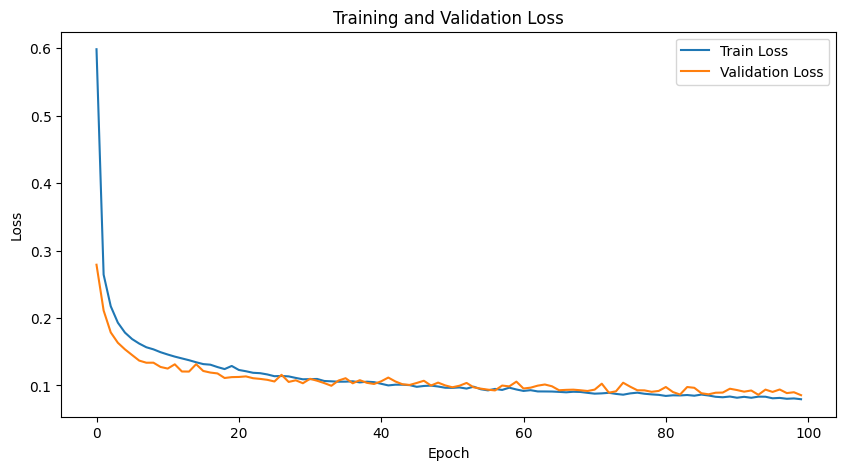

In [23]:
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion,num_epoch = 100, patience = 20)

In [24]:
# print(f'Learned weights: {model.fc1.weight.data}')
# print(f'Learned biases: {model.fc1.bias.data}')
# print(f'Learned weights: {model.fc2.weight.data}')
# print(f'Learned biases: {model.fc2.bias.data}')
# print(f'Learned weights: {model.fc3.weight.data}')
# print(f'Learned biases: {model.fc3.bias.data}')
# print(f'Learned weights: {model.fc4.weight.data}')
# print(f'Learned biases: {model.fc4.bias.data}')

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

print("Train report")
print(classification_report(train_labels, train_preds))
print("Val report")
print(classification_report(val_labels, val_preds))
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.2752 seconds to execute.
The function took 0.0953 seconds to execute.
The function took 0.0990 seconds to execute.
Train Accuracy: 97.1017
Validation Accuracy: 97.3456
Test Accuracy: 97.6523
Train report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11515
           1       0.93      0.94      0.93       866
           2       0.98      0.96      0.97      2292
           3       0.97      0.92      0.95      2958

    accuracy                           0.97     17631
   macro avg       0.96      0.95      0.96     17631
weighted avg       0.97      0.97      0.97     17631

Val report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3900
           1       0.94      0.95      0.95       286
           2       0.98      0.95      0.97       776
           3       0.98      0.93      0.95       915

    accuracy                           0.97      5877
   m

## Task3: The impact of specific features

As you learned in the lecture, biases in data collection can carry over to the model and become inductive biases.  
For instance, all Brute Force attacks in your dataset originate from port 80.  

- Is this a reasonable assumption?  
-  Now replace port 80 with port 8080 for the Brute Force attacks in the test set. Use the previously trained model for inference:  
    - Does the performance change?
    - How does it change?
    - Why?

Now remove the feature **port** from the original dataset (**use this dataset from now on for the entire lab**) and repeat all preprocessing steps.  

- How many PortScan instances do you now have after preprocessing?
- How many did you have before?
- Why do you think PortScan is the most affected class after dropping duplicates?
- Are the classes now balanced?

Now repeat the training process with the best architecture found in the previous step:  
- How does the performance change?
- Can you still classify the rarest class?

To improve performance and account for class imbalance, use a *weighted loss function*. Use the `weight` parameter of `CrossEntropyLoss`, which expects a tensor of class weights. To estimate the weights, use the `compute_class_weight` function from `sklearn` and set `class_weight="balanced"`. Repeat the training process with the new loss function.  

- How does the performance change per class and overall?
- How does the accuracy change?
- How does the F1-score change?  

### Bias analysis
All Brute Force attacks form port 80 is not a reasonable assumption. In real work they can target any port, depending on the exposed service. Assuming they only come from port 80 is a form of bias: it makes the model associate "port 80" directly with "Brute Force", rather than learning the true patterns of attack behavior. This bias may cause the model to fail to generalize to attacks using other ports.

In [25]:
# Creation of a fake sample to obtain the standardization of port 8080
sample = np.zeros((1, X_train.shape[1]))
sample[0, 13] = 8080
standardized_8080 = scaler.transform(sample)[0, 13]

In [26]:
X_test_modified = X_test.copy()

brute_force_indices = y_test == label_mapping['Brute Force']
port_col_index = df.columns.get_loc('Destination Port')

X_test_modified[brute_force_indices, port_col_index] = standardized_8080

### Evaluation on test set with Brute Force on port 8080


In [27]:
X_test_mod_tensor = torch.tensor(X_test_modified, dtype=torch.float32).to(device)
test_mod_dataset = TensorDataset(X_test_mod_tensor, y_test_tensor)
test_mod_loader = DataLoader(test_mod_dataset, batch_size=batch_size, shuffle=False)

test_accuracy, test_labels, test_preds = testing_model(model, test_mod_loader, device)


print(f'Test Accuracy: {test_accuracy:.4f}')
print("Test report")
print(classification_report(test_labels, test_preds))

The function took 0.0888 seconds to execute.
Test Accuracy: 93.1269
Test report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3827
           1       0.00      0.00      0.00       275
           2       0.98      0.97      0.97       800
           3       0.99      0.93      0.96       976

    accuracy                           0.93      5878
   macro avg       0.72      0.72      0.72      5878
weighted avg       0.89      0.93      0.91      5878



#### Label 1 (Brute Force) Analysis
- Precision → it don’t even predict Brute Force for anything.
- Recall → the model don’t correctly classify any Brute Force samples.
- F1-score → no balance between precision/recall because both are zero.

This means the model can't classify correctly the Brute Force's datapoint.

### Preprocessing w/o 'Destination Port' feature

In [28]:
df2 = pd.read_csv(dataset_url)
df2.drop(['SYN Flag Count','Fwd PSH Flags','Destination Port'], axis=1, inplace=True)
df2.drop_duplicates(inplace=True)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)
df2

,Flow Duration,Flow IAT Mean,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Label
0,303376,3.033760e+04,749.4,1448,12743.263,0,19.833334,98776.15,322.16666,119,6,36.258636,6,Benign
1,117,1.170000e+02,0.0,0,0.000,1,0.000000,0.00,0.00000,0,1,17094.018000,1,Benign
2,142,1.420000e+02,0.0,0,84507.040,0,6.000000,0.00,6.00000,6,2,14084.507000,2,Benign
3,191,6.366667e+01,52.0,52,921465.940,1,36.000000,0.00,42.40000,36,2,20942.408000,2,Benign
4,4,4.000000e+00,0.0,0,3000000.000,0,6.000000,0.00,6.00000,6,2,500000.000000,2,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0.0,0,0.000,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,Brute Force
31503,5862561,1.954187e+06,0.0,0,0.000,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,Brute Force
31504,5854872,1.951624e+06,0.0,0,0.000,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,Brute Force
31505,5555547,1.851849e+06,0.0,0,0.000,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,Brute Force


#### PortScan instances

In [29]:
cardinality_portscan_df = labels.value_counts().get('PortScan', 0)
cardinality_portscan_df2 = df2['Label'].value_counts().get('PortScan', 0)

print("PortScan datapoint before bias analysis: # " + str(cardinality_portscan_df))
print("PortScan datapoint after bias analysis: # " + str(cardinality_portscan_df2))

PortScan datapoint before bias analysis: # 4849
PortScan datapoint after bias analysis: # 285


A lot of `PortScan` datapoints are being dropped because the only differing feature is the Destination Port

#### Class balance
The dataset remains imbalanced also after bias analysis, with the `Benign` class still significantly outweighing the `PortScan` class, which has been drastically reduced.

In [30]:
class_balance_old = labels.value_counts()
print("Class balance before Bias Analysis")
print(class_balance_old)

print("Class balance after Bias Analysis")
class_balance = df2['Label'].value_counts()
print(class_balance)

Class balance before Bias Analysis
Label
Benign         19242
PortScan        4849
DoS Hulk        3868
Brute Force     1427
Name: count, dtype: int64
Class balance after Bias Analysis
Label
Benign         16889
DoS Hulk        3868
Brute Force     1427
PortScan         285
Name: count, dtype: int64


### New training with the latest architecture found in the previous step


In [31]:
df2 = df2.reset_index(drop=True)
X = df2[df2.columns[:-1]].values

labels2 = df2['Label']
df2['Label'] = label_encoder.transform(labels2)
y = df2['Label'].values

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

Training set: (13481, 13)
Validation set: (4494, 13)
Test set: (4494, 13)


In [32]:
# Prepare data loaders for mini-batch training
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch 10/100, Train Loss: 0.1349, Val Loss: 0.1330
Epoch 20/100, Train Loss: 0.1164, Val Loss: 0.1141
Epoch 30/100, Train Loss: 0.1003, Val Loss: 0.1068
Epoch 40/100, Train Loss: 0.0945, Val Loss: 0.0955
Epoch 50/100, Train Loss: 0.0902, Val Loss: 0.0947
Epoch 60/100, Train Loss: 0.0883, Val Loss: 0.0944
Epoch 70/100, Train Loss: 0.0848, Val Loss: 0.0930
Epoch 80/100, Train Loss: 0.0853, Val Loss: 0.0934
Epoch 90/100, Train Loss: 0.0818, Val Loss: 0.0986
Early stopping triggered.
Training completed in 60.10 seconds.


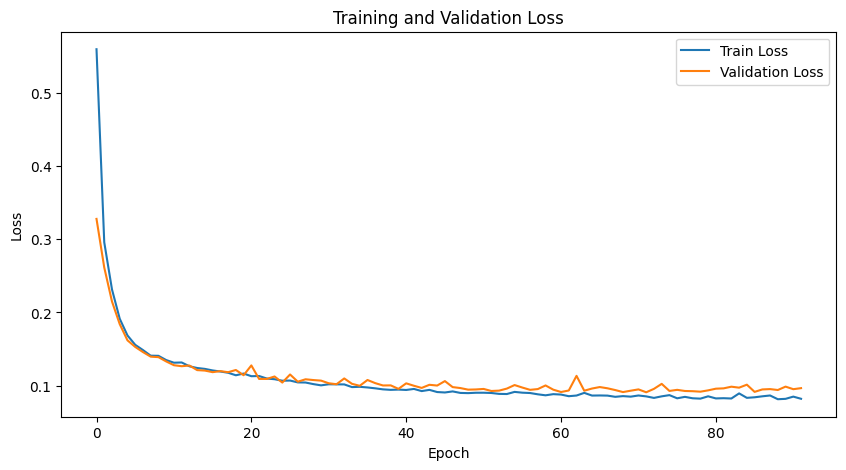

In [33]:
input_size = X_train_tensor.shape[1]
output_size = len(torch.unique(y_train_tensor))

model = NonLinearModel(input_size, output_size)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 100, patience = 20)

In [34]:
train_accuracy_noport, train_labels_noport, train_preds_noport = testing_model(model, train_loader, device)
val_accuracy_noport, val_labels_noport, val_preds_noport = testing_model(model, val_loader, device)
test_accuracy_noport, test_labels_noport, test_preds_noport = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy_noport:.4f}')
print(f'Validation Accuracy: {val_accuracy_noport:.4f}')
print(f'Test Accuracy: {test_accuracy_noport:.4f}')

print("Train report")
print(classification_report(train_labels_noport, train_preds_noport))
print("Val report")
print(classification_report(val_labels_noport, val_preds_noport))
print("Test report")
print(classification_report(test_labels_noport, test_preds_noport))

The function took 0.2239 seconds to execute.
The function took 0.0671 seconds to execute.
The function took 0.0683 seconds to execute.
Train Accuracy: 96.2688
Validation Accuracy: 96.3952
Test Accuracy: 96.3952
Train report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10133
           1       0.94      0.95      0.94       855
           2       1.00      0.90      0.95      2318
           3       0.38      0.35      0.37       175

    accuracy                           0.96     13481
   macro avg       0.82      0.80      0.81     13481
weighted avg       0.96      0.96      0.96     13481

Val report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3377
           1       0.93      0.92      0.93       273
           2       1.00      0.91      0.95       786
           3       0.43      0.41      0.42        58

    accuracy                           0.96      4494
   m

While the overall accuracy metrics of the model still look good, the performance for the rare class PortScan has significantly decreased in the new model. The model is struggling to identify this rare class effectively, especially when compared to the previous model.
- Recall and F1-scores for PortScan have dropped, meaning the model is missing many instances of this rare class.
- The model can classify PortScan with significantly reduced performance.

### Weighted loss function

Epoch 10/100, Train Loss: 0.2339, Val Loss: 0.2504
Epoch 20/100, Train Loss: 0.2034, Val Loss: 0.2536
Epoch 30/100, Train Loss: 0.1869, Val Loss: 0.2257
Epoch 40/100, Train Loss: 0.1779, Val Loss: 0.2308
Epoch 50/100, Train Loss: 0.1626, Val Loss: 0.2334
Epoch 60/100, Train Loss: 0.1558, Val Loss: 0.2274
Epoch 70/100, Train Loss: 0.1551, Val Loss: 0.2207
Epoch 80/100, Train Loss: 0.1436, Val Loss: 0.2182
Epoch 90/100, Train Loss: 0.1365, Val Loss: 0.2334
Early stopping triggered.
Training completed in 60.40 seconds.


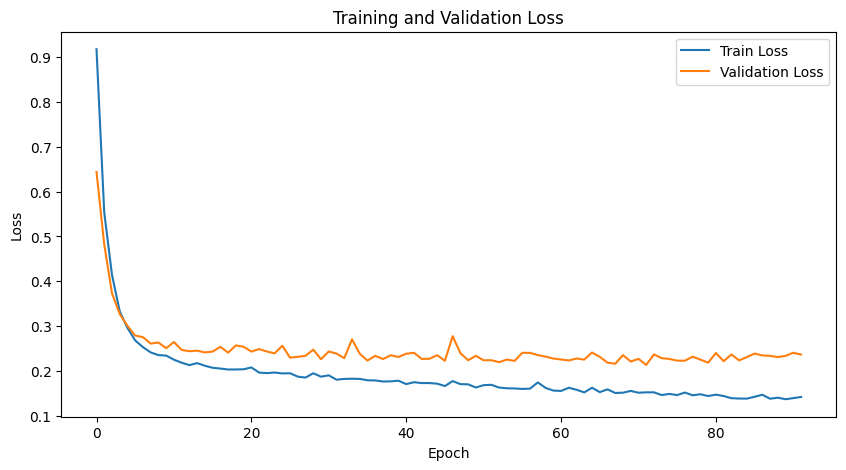

In [35]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

model = NonLinearModel(input_size, output_size)
model = model.to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
model, train_losses, val_losses = training_loop_with_minibatch(model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 100, patience = 20)

In [36]:
train_accuracy_noport_weights, train_labels_noport_weights, train_preds_noport_weights = testing_model(model, train_loader, device)
val_accuracy_noport_weights, val_labels_noport_weights, val_preds_noport_weights = testing_model(model, val_loader, device)
test_accuracy_noport_weights, test_labels_noport_weights, test_preds_noport_weights = testing_model(model, test_loader, device)

print(f'Train Accuracy: {train_accuracy_noport_weights:.4f}')
print(f'Validation Accuracy: {val_accuracy_noport_weights:.4f}')
print(f'Test Accuracy: {test_accuracy_noport_weights:.4f}')

print("Train report")
print(classification_report(train_labels_noport_weights, train_preds_noport_weights))
print("Val report")
print(classification_report(val_labels_noport_weights, val_preds_noport_weights))
print("Test report")
print(classification_report(test_labels_noport_weights, test_preds_noport_weights))

The function took 0.2208 seconds to execute.
The function took 0.0674 seconds to execute.
The function took 0.0824 seconds to execute.
Train Accuracy: 93.1682
Validation Accuracy: 93.5915
Test Accuracy: 93.1019
Train report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     10133
           1       0.88      0.96      0.92       855
           2       0.91      0.94      0.92      2318
           3       0.25      0.98      0.39       175

    accuracy                           0.93     13481
   macro avg       0.76      0.95      0.80     13481
weighted avg       0.96      0.93      0.94     13481

Val report
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3377
           1       0.89      0.93      0.91       273
           2       0.91      0.95      0.93       786
           3       0.26      0.98      0.41        58

    accuracy                           0.94      4494
   m

The drastic drop in precision for class 3 when we introduce class weights is likely due to the model becoming too focused on this class during training, which leads to an increase in false positives.
Precision Definition:

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$


So, when the model starts predicting class 3 more often (due to the increased weight), the False Positives for class 3 increase, which leads to a drop in precision.

**Performance per Class**: The performance across different classes changes when class weights are introduced. For some classes, such as class 3, precision decreases significantly, which means the model is now classifying many instances as class 3 incorrectly (false positives). For other classes, like class 0, while the recall remains high, the precision drops slightly, indicating the model is misclassifying some instances of other classes as class 0. The F1-score for class 3 decreases as well, showing a negative impact on both precision and recall. Overall, the rare class (class 3) gets more attention but with less precision, and the balance of performance between classes is affected.

**Accuracy**: Accuracy decreases significantly when class weights are applied. The model’s overall accuracy drops from approximately 97% to 90%. This indicates that while the model improves its ability to predict the rare class (class 3) by focusing on it more, this comes at the cost of performance on other classes, leading to a decrease in overall correct predictions.

**F1-score**: The F1-score, which balances precision and recall, also decreases across the board when class weights are applied. The F1-score for the rare class (class 3) drops significantly, mainly due to the large increase in false positives. While recall for class 3 increases, precision for class 3 suffers, causing the F1-score to decrease. The overall F1-score drops as well, indicating that the model's balance between precision and recall has been disrupted, and it is performing less effectively overall.

In short, while the class weights help improve recall for the minority class, they also lead to a higher number of false positives, hurting precision and the overall F1-score, as well as reducing the model's overall accuracy.

## Task 4: Deep Neural Network


### Different Layer architectures

| **Hyperparameter**         | **Value**                      |
|----------------------------|--------------------------------|
| Layers                     | 2 to 5                         |
| Neurons per Layer          | {2, 4, 8, 16, 32}              |
| Activation                 | ReLU                           |
| Weight Initialization      | Default                        |
| Batch Size                 | 128                            |
| Loss Function              | Cross-Entropy                  |
| Optimizer                  | AdamW                          |
| Learning Rate              | 0.0005                         |
| Epochs & Early Stopping    | 50 or shorter based on the designed criteria |
| Regularization             | None                           |

Compare different architectures and:
- Identify the best-performing architecture.
- Plot and analyze the losses.
- Evaluate the performance of the validation and test set.


Training with: [16, 8]
Epoch 10/50, Train Loss: 0.2694, Val Loss: 0.2653
Epoch 20/50, Train Loss: 0.1978, Val Loss: 0.1996
Epoch 30/50, Train Loss: 0.1651, Val Loss: 0.1704
Epoch 40/50, Train Loss: 0.1528, Val Loss: 0.1606
Epoch 50/50, Train Loss: 0.1468, Val Loss: 0.1522
Training completed in 25.64 seconds.


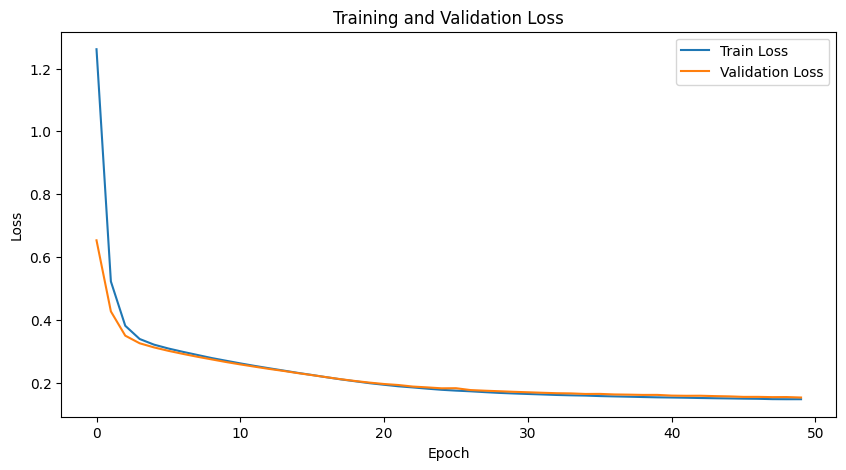

The function took 0.2091 seconds to execute.
The function took 0.0873 seconds to execute.
The function took 0.0661 seconds to execute.
Train Accuracy: 94.6072
Validation Accuracy: 94.5260
Test Accuracy: 94.1923

Training with: [32, 16]
Epoch 10/50, Train Loss: 0.2068, Val Loss: 0.2046
Epoch 20/50, Train Loss: 0.1538, Val Loss: 0.1569
Epoch 30/50, Train Loss: 0.1374, Val Loss: 0.1473
Epoch 40/50, Train Loss: 0.1291, Val Loss: 0.1317
Epoch 50/50, Train Loss: 0.1226, Val Loss: 0.1251
Training completed in 27.06 seconds.


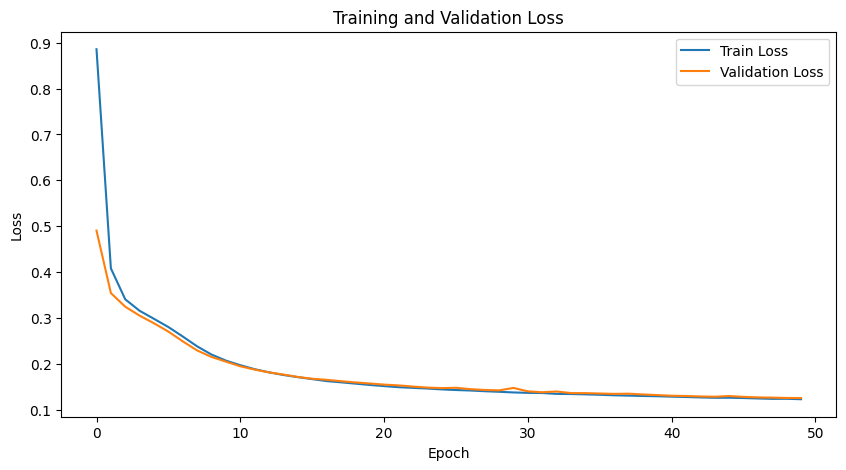

The function took 0.2021 seconds to execute.
The function took 0.0628 seconds to execute.
The function took 0.0631 seconds to execute.
Train Accuracy: 94.6146
Validation Accuracy: 94.5705
Test Accuracy: 94.3480

Training with: [32, 16, 8]
Epoch 10/50, Train Loss: 0.2093, Val Loss: 0.2035
Epoch 20/50, Train Loss: 0.1614, Val Loss: 0.1578
Epoch 30/50, Train Loss: 0.1350, Val Loss: 0.1312
Epoch 40/50, Train Loss: 0.1210, Val Loss: 0.1167
Epoch 50/50, Train Loss: 0.1125, Val Loss: 0.1120
Training completed in 29.85 seconds.


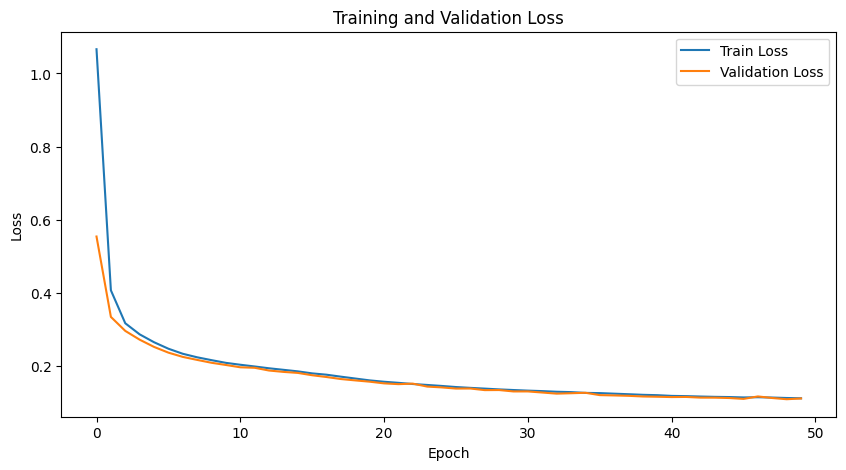

The function took 0.3302 seconds to execute.
The function took 0.0953 seconds to execute.
The function took 0.1060 seconds to execute.
Train Accuracy: 95.5345
Validation Accuracy: 95.3494
Test Accuracy: 95.1046

Training with: [32, 16, 8, 4]
Epoch 10/50, Train Loss: 0.2325, Val Loss: 0.2236
Epoch 20/50, Train Loss: 0.1780, Val Loss: 0.1722
Epoch 30/50, Train Loss: 0.1523, Val Loss: 0.1478
Epoch 40/50, Train Loss: 0.1382, Val Loss: 0.1372
Epoch 50/50, Train Loss: 0.1320, Val Loss: 0.1341
Training completed in 33.35 seconds.


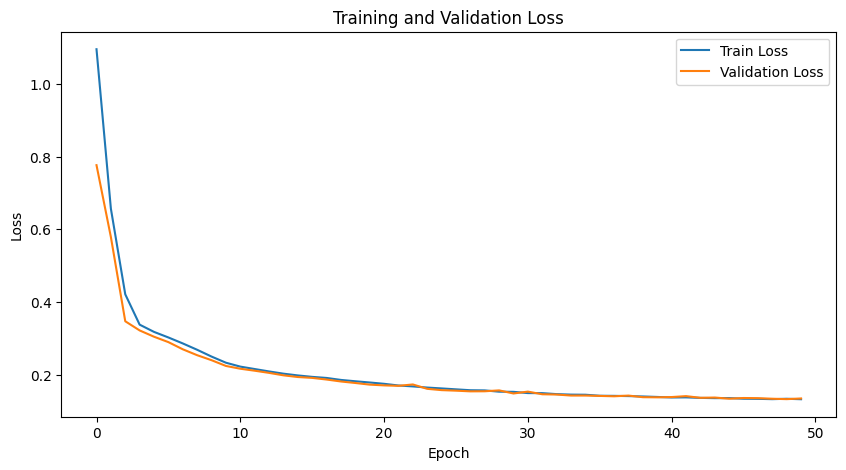

The function took 0.2143 seconds to execute.
The function took 0.0649 seconds to execute.
The function took 0.0657 seconds to execute.
Train Accuracy: 95.3268
Validation Accuracy: 95.5719
Test Accuracy: 95.2158

Training with: [32, 16, 8, 4, 2]
Epoch 10/50, Train Loss: 0.8823, Val Loss: 0.8706
Epoch 20/50, Train Loss: 0.7830, Val Loss: 0.7778
Epoch 30/50, Train Loss: 0.7583, Val Loss: 0.7539
Epoch 40/50, Train Loss: 0.7506, Val Loss: 0.7471
Epoch 50/50, Train Loss: 0.7489, Val Loss: 0.7456
Training completed in 35.95 seconds.


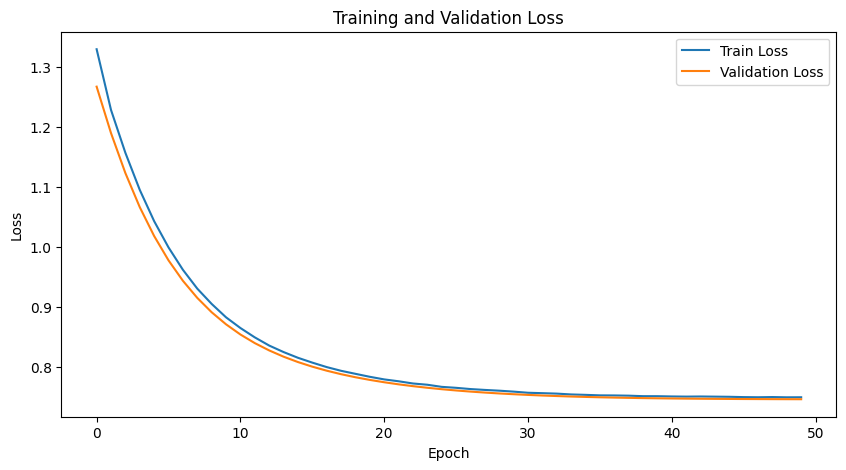

The function took 0.2104 seconds to execute.
The function took 0.0670 seconds to execute.
The function took 0.0680 seconds to execute.
Train Accuracy: 75.1650
Validation Accuracy: 75.1446
Test Accuracy: 75.1891

Training with: [32, 32]
Epoch 10/50, Train Loss: 0.1871, Val Loss: 0.1868
Epoch 20/50, Train Loss: 0.1449, Val Loss: 0.1461
Epoch 30/50, Train Loss: 0.1316, Val Loss: 0.1336
Epoch 40/50, Train Loss: 0.1228, Val Loss: 0.1241
Epoch 50/50, Train Loss: 0.1168, Val Loss: 0.1183
Training completed in 26.23 seconds.


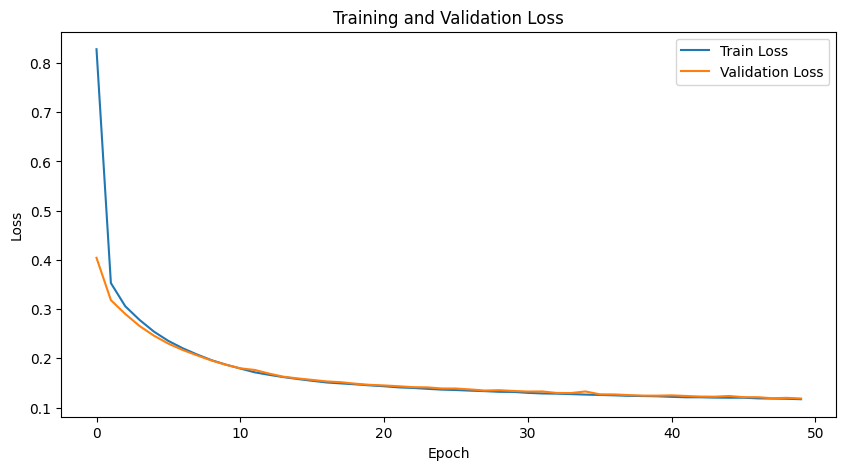

The function took 0.2016 seconds to execute.
The function took 0.0640 seconds to execute.
The function took 0.0809 seconds to execute.
Train Accuracy: 95.4232
Validation Accuracy: 95.4606
Test Accuracy: 95.1268

Training with: [16, 16, 16]
Epoch 10/50, Train Loss: 0.2034, Val Loss: 0.2002
Epoch 20/50, Train Loss: 0.1577, Val Loss: 0.1588
Epoch 30/50, Train Loss: 0.1401, Val Loss: 0.1403
Epoch 40/50, Train Loss: 0.1270, Val Loss: 0.1310
Epoch 50/50, Train Loss: 0.1171, Val Loss: 0.1203
Training completed in 30.09 seconds.


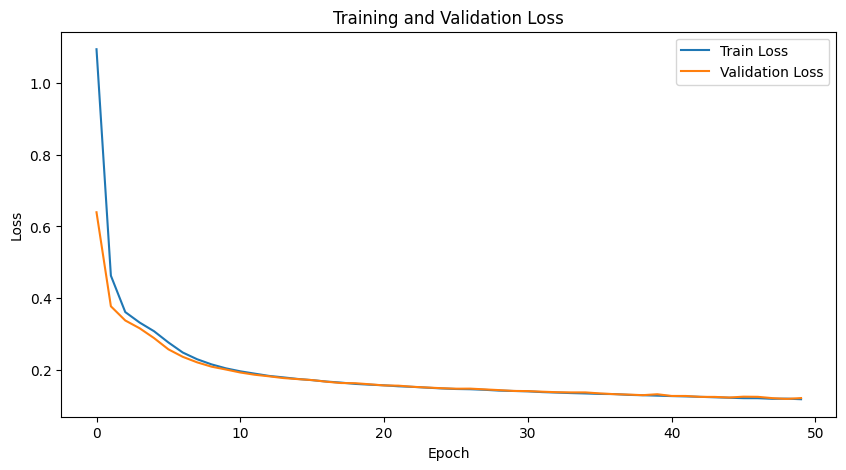

The function took 0.2105 seconds to execute.
The function took 0.0656 seconds to execute.
The function took 0.0647 seconds to execute.
Train Accuracy: 95.7941
Validation Accuracy: 95.7944
Test Accuracy: 95.5496

Training with: [32, 32, 32]
Epoch 10/50, Train Loss: 0.1713, Val Loss: 0.1669
Epoch 20/50, Train Loss: 0.1326, Val Loss: 0.1350
Epoch 30/50, Train Loss: 0.1197, Val Loss: 0.1201
Epoch 40/50, Train Loss: 0.1108, Val Loss: 0.1119
Epoch 50/50, Train Loss: 0.1044, Val Loss: 0.1057
Training completed in 29.24 seconds.


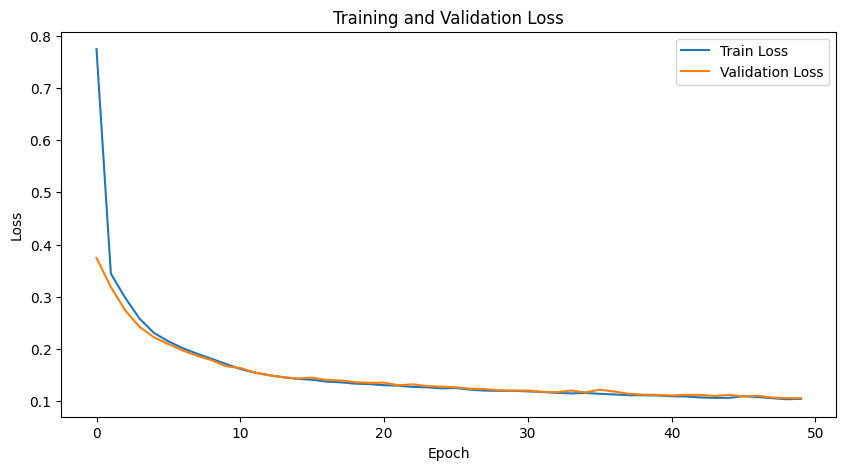

The function took 0.2029 seconds to execute.
The function took 0.0639 seconds to execute.
The function took 0.0617 seconds to execute.
Train Accuracy: 95.8163
Validation Accuracy: 95.7721
Test Accuracy: 96.0169

Training with: [32, 32, 32, 32, 32]
Epoch 10/50, Train Loss: 0.1515, Val Loss: 0.1497
Epoch 20/50, Train Loss: 0.1271, Val Loss: 0.1264
Epoch 30/50, Train Loss: 0.1168, Val Loss: 0.1129
Epoch 40/50, Train Loss: 0.1067, Val Loss: 0.1027
Epoch 50/50, Train Loss: 0.0992, Val Loss: 0.0985
Training completed in 36.96 seconds.


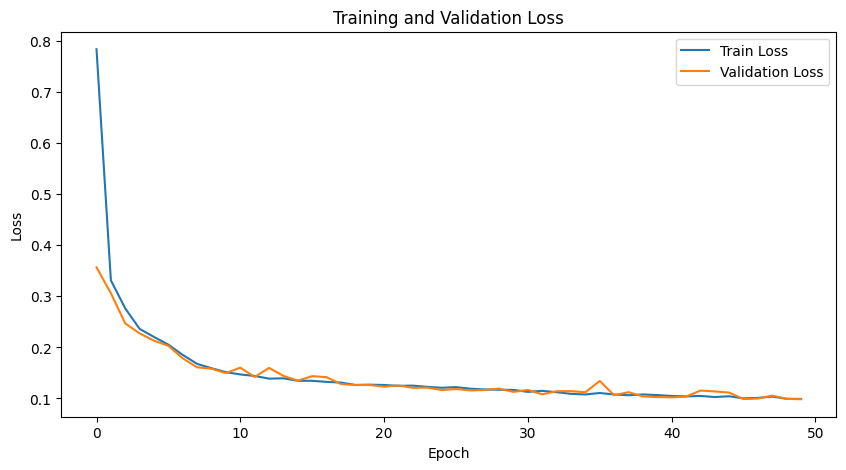

The function took 0.2138 seconds to execute.
The function took 0.0733 seconds to execute.
The function took 0.0685 seconds to execute.
Train Accuracy: 96.4469
Validation Accuracy: 96.2839
Test Accuracy: 96.5510

Training with: [8, 16, 8]
Epoch 10/50, Train Loss: 0.2826, Val Loss: 0.2753
Epoch 20/50, Train Loss: 0.2148, Val Loss: 0.2157
Epoch 30/50, Train Loss: 0.1838, Val Loss: 0.1896
Epoch 40/50, Train Loss: 0.1671, Val Loss: 0.1719
Epoch 50/50, Train Loss: 0.1569, Val Loss: 0.1648
Training completed in 28.57 seconds.


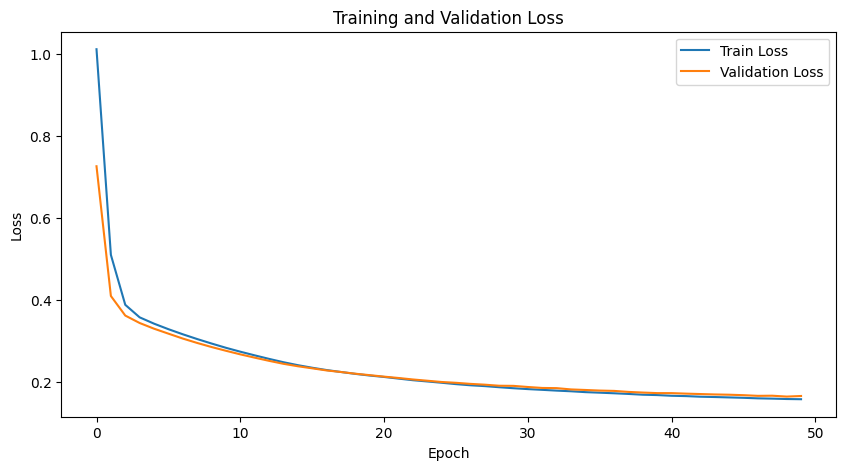

The function took 0.2239 seconds to execute.
The function took 0.0640 seconds to execute.
The function took 0.0631 seconds to execute.
Train Accuracy: 94.2586
Validation Accuracy: 94.1923
Test Accuracy: 93.9920

Training with: [8, 16, 16, 8]
Epoch 10/50, Train Loss: 0.2825, Val Loss: 0.2750
Epoch 20/50, Train Loss: 0.2000, Val Loss: 0.1978
Epoch 30/50, Train Loss: 0.1695, Val Loss: 0.1730
Epoch 40/50, Train Loss: 0.1536, Val Loss: 0.1570
Epoch 50/50, Train Loss: 0.1417, Val Loss: 0.1458
Training completed in 33.84 seconds.


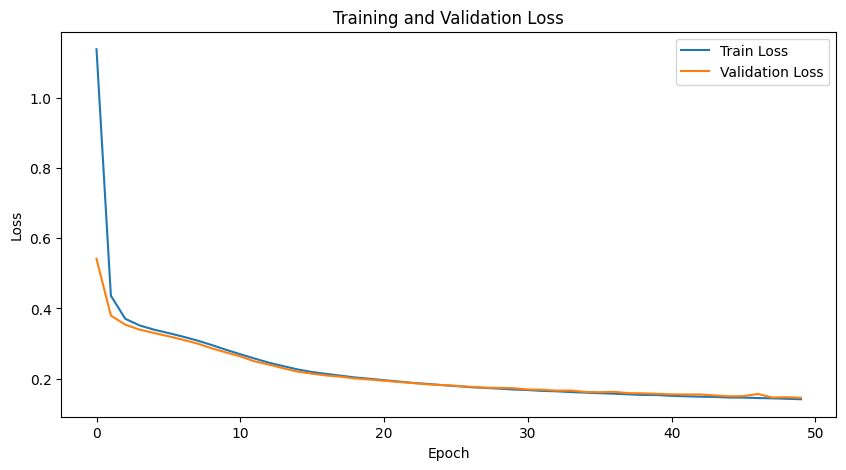

The function took 0.2147 seconds to execute.
The function took 0.0684 seconds to execute.
The function took 0.0718 seconds to execute.
Train Accuracy: 95.1784
Validation Accuracy: 94.9043
Test Accuracy: 95.0823

Training with: [16, 32, 32, 16]
Epoch 10/50, Train Loss: 0.1629, Val Loss: 0.1601
Epoch 20/50, Train Loss: 0.1336, Val Loss: 0.1336
Epoch 30/50, Train Loss: 0.1231, Val Loss: 0.1235
Epoch 40/50, Train Loss: 0.1159, Val Loss: 0.1300
Epoch 50/50, Train Loss: 0.1075, Val Loss: 0.1089
Training completed in 33.81 seconds.


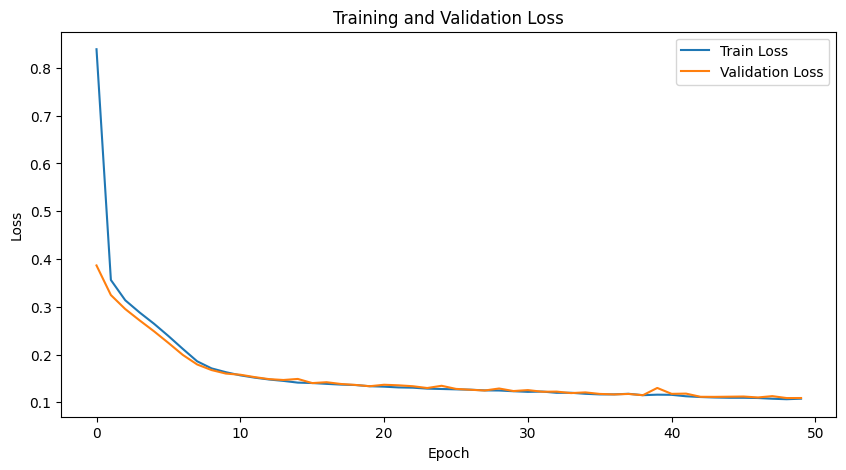

The function took 0.2121 seconds to execute.
The function took 0.0670 seconds to execute.
The function took 0.0625 seconds to execute.
Train Accuracy: 96.1353
Validation Accuracy: 96.3507
Test Accuracy: 96.3062

Training with: [8, 16, 32, 16, 8]
Epoch 10/50, Train Loss: 0.2145, Val Loss: 0.2039
Epoch 20/50, Train Loss: 0.1563, Val Loss: 0.1524
Epoch 30/50, Train Loss: 0.1363, Val Loss: 0.1325
Epoch 40/50, Train Loss: 0.1259, Val Loss: 0.1269
Epoch 50/50, Train Loss: 0.1227, Val Loss: 0.1166
Training completed in 37.32 seconds.


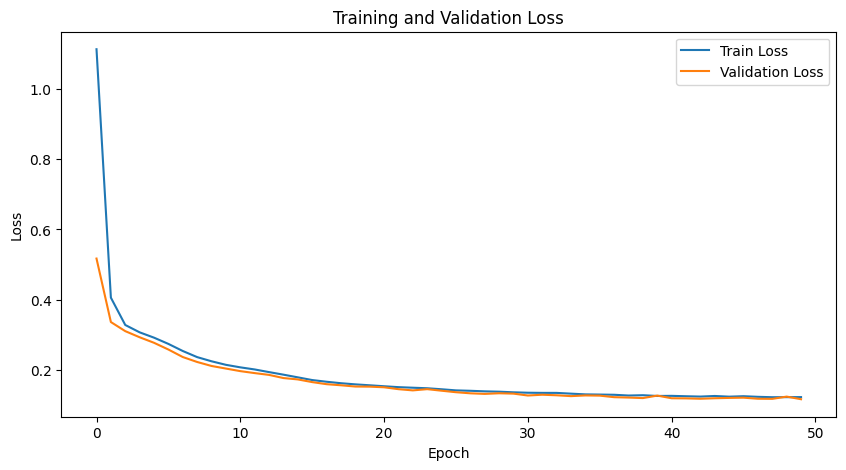

The function took 0.2446 seconds to execute.
The function took 0.0716 seconds to execute.
The function took 0.0696 seconds to execute.
Train Accuracy: 95.8534
Validation Accuracy: 95.8834
Test Accuracy: 95.8166

Training with: [2, 4, 8, 4]
Epoch 10/50, Train Loss: 0.3572, Val Loss: 0.3502
Epoch 20/50, Train Loss: 0.3174, Val Loss: 0.3109
Epoch 30/50, Train Loss: 0.2948, Val Loss: 0.2895
Epoch 40/50, Train Loss: 0.2799, Val Loss: 0.2767
Epoch 50/50, Train Loss: 0.2670, Val Loss: 0.2648
Training completed in 31.09 seconds.


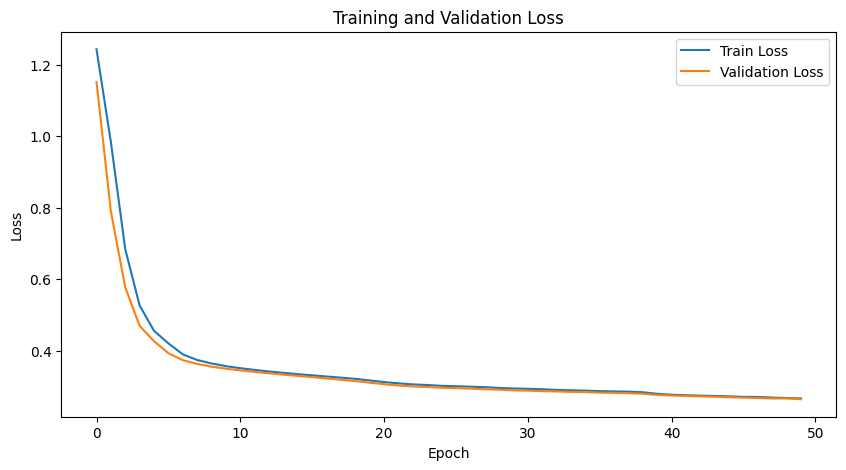

The function took 0.2186 seconds to execute.
The function took 0.0661 seconds to execute.
The function took 0.0721 seconds to execute.
Train Accuracy: 89.9637
Validation Accuracy: 90.2092
Test Accuracy: 89.6306

Training with: [16, 16, 32, 32, 16]
Epoch 10/50, Train Loss: 0.1703, Val Loss: 0.1615
Epoch 20/50, Train Loss: 0.1273, Val Loss: 0.1187
Epoch 30/50, Train Loss: 0.1146, Val Loss: 0.1080
Epoch 40/50, Train Loss: 0.1059, Val Loss: 0.1034
Epoch 50/50, Train Loss: 0.1009, Val Loss: 0.1005
Training completed in 36.84 seconds.


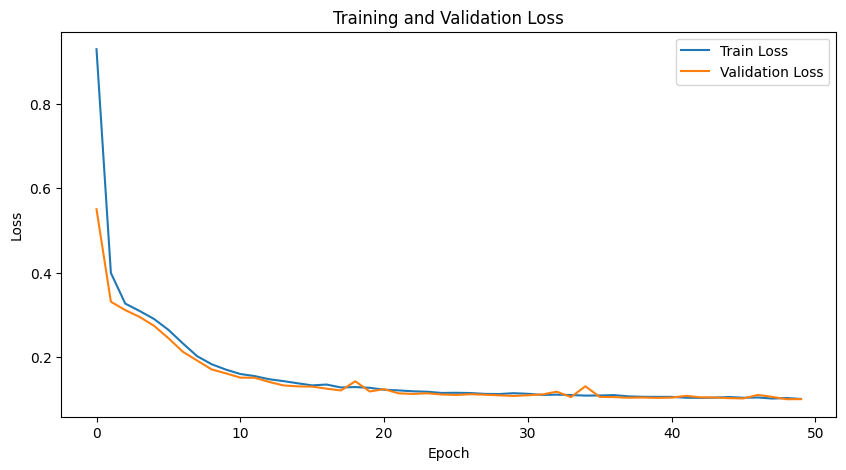

The function took 0.2304 seconds to execute.
The function took 0.0756 seconds to execute.
The function took 0.0766 seconds to execute.
Train Accuracy: 96.3653
Validation Accuracy: 96.2394
Test Accuracy: 96.2839


In [37]:
architectures = [
    # — funnel nets —
    [16, 8],             # 2 layers
    [32, 16],            # 2 layers
    [32, 16, 8],         # 3 layers
    [32, 16, 8, 4],      # 4 layers
    [32, 16, 8, 4, 2],   # 5 layers
    # — uniform nets —
    [32, 32],
    [16, 16, 16],
    [32, 32, 32],
    [32, 32, 32, 32, 32],
    # — hourglass nets (expand then contract) —
    [8, 16, 8],
    [8, 16, 16, 8],
    [16, 32, 32, 16],
    [8, 16, 32, 16, 8],
    # — sparse nets —
    [2, 4, 8, 4],
    [16, 16, 32, 32, 16]
]

class MulticlassNN(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(MulticlassNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

results = []

best_architecture = None
best_val_acc = 0

# Try each architecture
for hidden_layers in architectures:
    print(f"\nTraining with: {hidden_layers}")
    model = MulticlassNN(input_size, hidden_layers, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )
    train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    # Finally print the results
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        best_architecture = hidden_layers

In [38]:
print(f"Best architecture: {best_architecture}, Val Accuracy: {best_val_acc:.2f}%")

Best architecture: [16, 32, 32, 16], Val Accuracy: 96.35%


### The impact of batch size
Use the best hyperparameter identified in the previous step and experiment with different
batch sizes.

In particular, use as batch size: {1, 32, 64, 128, 512}.

- Does the performance change? And why? Report both the validation and test results.
- How long does it take to train the models depending on the batch size? And why?


Training with batch size: 1
Epoch 10/50, Train Loss: 0.1378, Val Loss: 0.1344
Epoch 20/50, Train Loss: 0.1296, Val Loss: 0.1272
Epoch 30/50, Train Loss: 0.1269, Val Loss: 0.1230
Epoch 40/50, Train Loss: 0.1276, Val Loss: 0.1796
Epoch 50/50, Train Loss: 0.1298, Val Loss: 0.1203
Training completed in 1431.64 seconds.


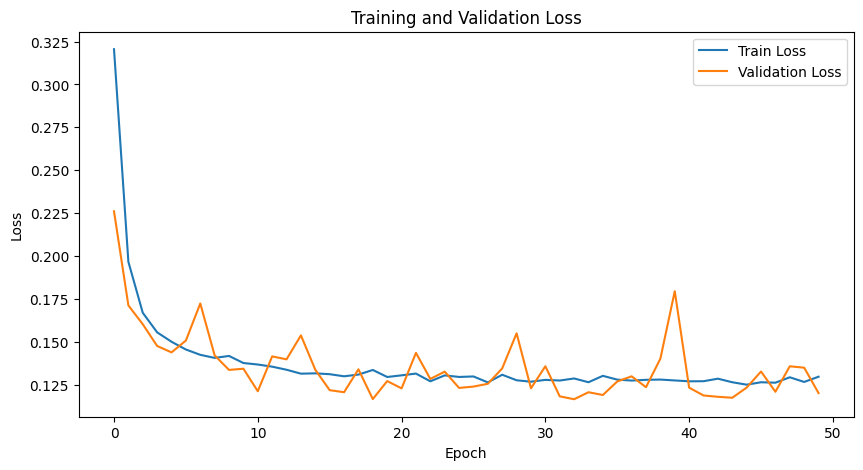

The function took 1.2808 seconds to execute.
The function took 1.2812 seconds to execute.
Validation Accuracy: 95.55%
Test Accuracy: 95.44%
Training Time: 1432.37 seconds

Training with batch size: 32
Epoch 10/50, Train Loss: 0.1558, Val Loss: 0.1563
Epoch 20/50, Train Loss: 0.1316, Val Loss: 0.1346
Epoch 30/50, Train Loss: 0.1168, Val Loss: 0.1145
Epoch 40/50, Train Loss: 0.1094, Val Loss: 0.1065
Epoch 50/50, Train Loss: 0.1085, Val Loss: 0.1062
Training completed in 57.95 seconds.


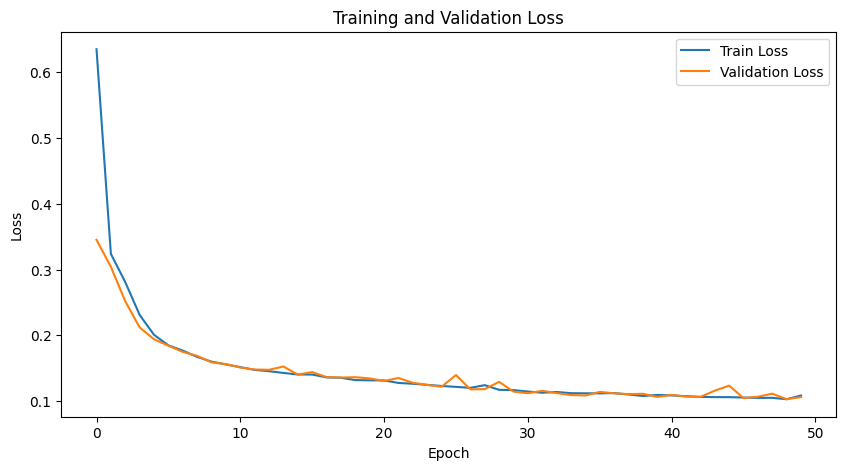

The function took 0.0988 seconds to execute.
The function took 0.0885 seconds to execute.
Validation Accuracy: 95.55%
Test Accuracy: 95.55%
Training Time: 58.11 seconds

Training with batch size: 64
Epoch 10/50, Train Loss: 0.1800, Val Loss: 0.1732
Epoch 20/50, Train Loss: 0.1348, Val Loss: 0.1393
Epoch 30/50, Train Loss: 0.1170, Val Loss: 0.1215
Epoch 40/50, Train Loss: 0.1078, Val Loss: 0.1082
Epoch 50/50, Train Loss: 0.1019, Val Loss: 0.1059
Training completed in 35.16 seconds.


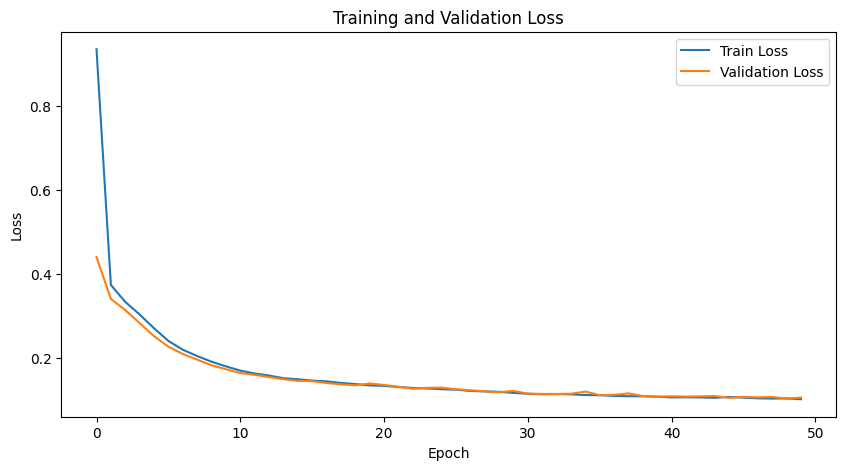

The function took 0.0818 seconds to execute.
The function took 0.0720 seconds to execute.
Validation Accuracy: 96.13%
Test Accuracy: 96.19%
Training Time: 35.33 seconds

Training with batch size: 128
Epoch 10/50, Train Loss: 0.2312, Val Loss: 0.2197
Epoch 20/50, Train Loss: 0.1594, Val Loss: 0.1562
Epoch 30/50, Train Loss: 0.1332, Val Loss: 0.1375
Epoch 40/50, Train Loss: 0.1218, Val Loss: 0.1174
Epoch 50/50, Train Loss: 0.1156, Val Loss: 0.1115
Training completed in 22.07 seconds.


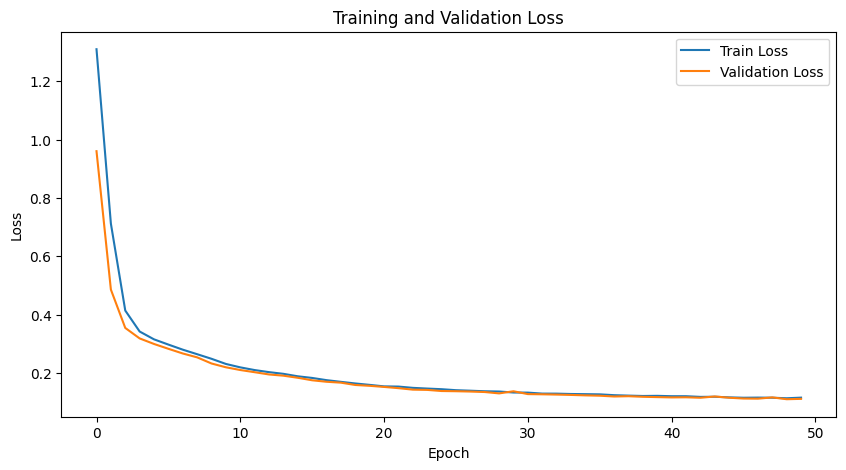

The function took 0.0850 seconds to execute.
The function took 0.0849 seconds to execute.
Validation Accuracy: 96.08%
Test Accuracy: 95.95%
Training Time: 22.22 seconds

Training with batch size: 512
Epoch 10/50, Train Loss: 0.3374, Val Loss: 0.3278
Epoch 20/50, Train Loss: 0.2776, Val Loss: 0.2722
Epoch 30/50, Train Loss: 0.2153, Val Loss: 0.2133
Epoch 40/50, Train Loss: 0.1824, Val Loss: 0.1816
Epoch 50/50, Train Loss: 0.1578, Val Loss: 0.1587
Training completed in 14.76 seconds.


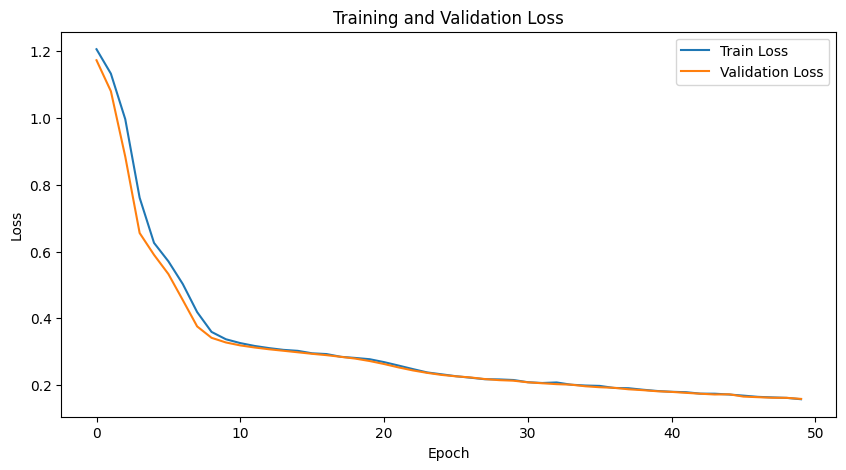

The function took 0.0645 seconds to execute.
The function took 0.0634 seconds to execute.
Validation Accuracy: 94.08%
Test Accuracy: 93.88%
Training Time: 14.91 seconds


In [39]:
batch_sizes = [1, 32, 64, 128, 512]
batch_results = []

for batch_size in batch_sizes:
    print(f"\nTraining with batch size: {batch_size}")

    # Recreate dataloaders with new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # Initialize new model with best architecture
    model = MulticlassNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    # Train the model and measure time
    start_train_time = time.time()
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )
    train_duration = time.time() - start_train_time

    # Evaluate performance
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {train_duration:.2f} seconds")

    # Store the results
    batch_results.append({
        'batch_size': batch_size,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_time_sec': train_duration
    })

In [40]:
# Summarize results
print("--- Summary of Batch Size Impact ---")
for result in batch_results:
    print(f"Batch Size: {result['batch_size']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%, "
          f"Training Time: {result['train_time_sec']:.2f} sec")

best_batch = max(batch_results, key=lambda x: x['val_accuracy'])

print(f"\nBest batch size: {best_batch['batch_size']}, Val Accuracy: {best_batch['val_accuracy']:.2f}%, Test Accuracy: {best_batch['test_accuracy']:.2f}%")
best_batchsize = best_batch['batch_size']

train_loader = DataLoader(train_dataset, batch_size=best_batchsize, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=best_batchsize)
test_loader = DataLoader(test_dataset, batch_size=best_batchsize)

--- Summary of Batch Size Impact ---
Batch Size: 1, Validation Accuracy: 95.55%, Test Accuracy: 95.44%, Training Time: 1432.37 sec
Batch Size: 32, Validation Accuracy: 95.55%, Test Accuracy: 95.55%, Training Time: 58.11 sec
Batch Size: 64, Validation Accuracy: 96.13%, Test Accuracy: 96.19%, Training Time: 35.33 sec
Batch Size: 128, Validation Accuracy: 96.08%, Test Accuracy: 95.95%, Training Time: 22.22 sec
Batch Size: 512, Validation Accuracy: 94.08%, Test Accuracy: 93.88%, Training Time: 14.91 sec

Best batch size: 64, Val Accuracy: 96.13%, Test Accuracy: 96.19%


### The impact of the Activation Function
Use the best hyperparameter identified in the previous steps and experiment with different
activation functions.

In particular, use as activation functions: Linear, Sigmoid, ReLU.

- Does the performance change? Why does it change? Report both the validation and the
test results.
- Explain why and how the different activation functions affect performance in this archi-
tecture


Using Activation Function: Linear
Epoch 10/50, Train Loss: 0.3118, Val Loss: 0.3038
Epoch 20/50, Train Loss: 0.3022, Val Loss: 0.3009
Epoch 30/50, Train Loss: 0.2998, Val Loss: 0.2900
Epoch 40/50, Train Loss: 0.2880, Val Loss: 0.2841
Epoch 50/50, Train Loss: 0.2928, Val Loss: 0.2942
Training completed in 31.38 seconds.


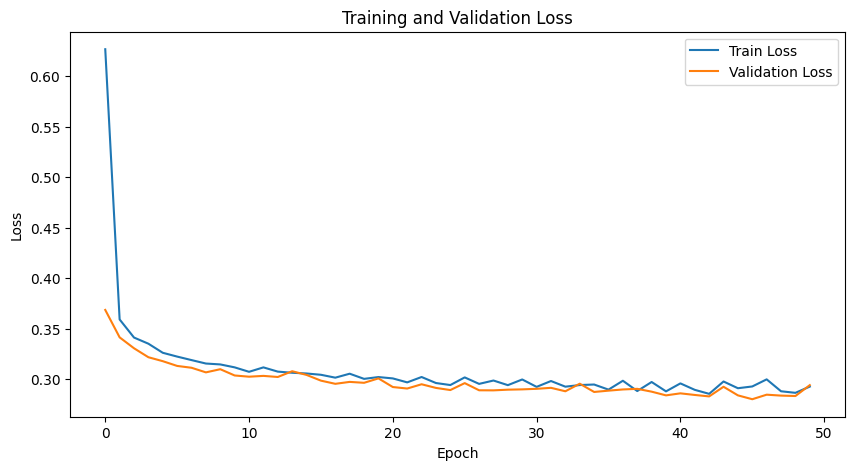

The function took 0.0787 seconds to execute.
The function took 0.0649 seconds to execute.
Validation Accuracy: 89.81%
Test Accuracy: 89.10%

Using Activation Function: Sigmoid
Epoch 10/50, Train Loss: 0.4042, Val Loss: 0.3954
Epoch 20/50, Train Loss: 0.3999, Val Loss: 0.3917
Epoch 30/50, Train Loss: 0.3978, Val Loss: 0.3914
Epoch 40/50, Train Loss: 0.3947, Val Loss: 0.3915
Epoch 50/50, Train Loss: 0.3941, Val Loss: 0.3904
Training completed in 34.25 seconds.


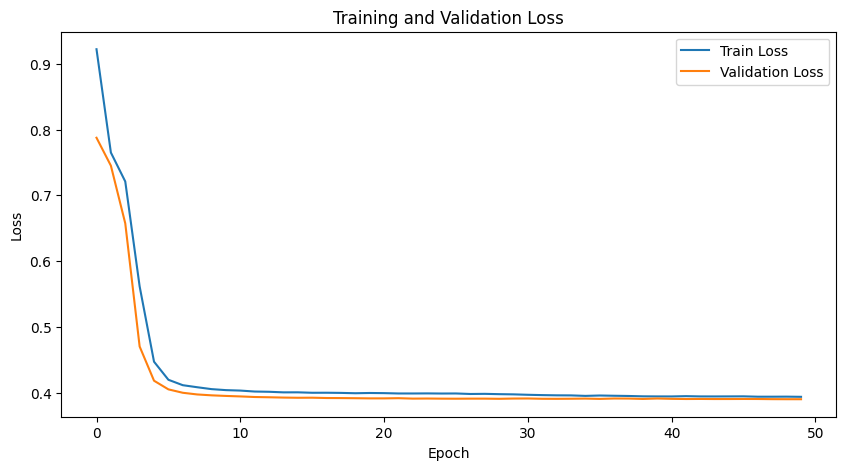

The function took 0.0771 seconds to execute.
The function took 0.0655 seconds to execute.
Validation Accuracy: 90.21%
Test Accuracy: 89.68%

Using Activation Function: ReLU
Epoch 10/50, Train Loss: 0.1715, Val Loss: 0.1702
Epoch 20/50, Train Loss: 0.1261, Val Loss: 0.1247
Epoch 30/50, Train Loss: 0.1138, Val Loss: 0.1225
Epoch 40/50, Train Loss: 0.1048, Val Loss: 0.1049
Epoch 50/50, Train Loss: 0.0997, Val Loss: 0.0997
Training completed in 36.25 seconds.


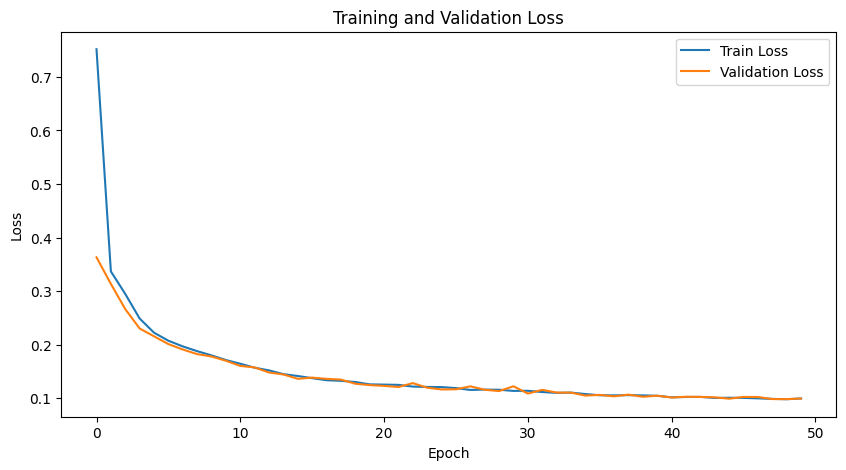

The function took 0.0802 seconds to execute.
The function took 0.0939 seconds to execute.
Validation Accuracy: 96.24%
Test Accuracy: 96.08%


In [41]:
activations = {
    'Linear': nn.Identity(),
    'Sigmoid': nn.Sigmoid(),
    'ReLU': nn.ReLU()
}

class ActivationsNN(nn.Module):
    def __init__(self, input_size, hidden_layers, activation_fn, output_size):
        super(ActivationsNN, self).__init__()
        layers = []
        prev_size = input_size
        for hidden_size in hidden_layers:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(activation_fn)  #selected activation
            prev_size = hidden_size
        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

activation_results = []

for name, activation_fn in activations.items():
    print(f"\nUsing Activation Function: {name}")

    model = ActivationsNN(input_size, best_architecture, activation_fn, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005)

    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )

    # Evaluate performance
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")

    # Store the results
    activation_results.append({
            'activation': name,
            'val_accuracy': val_accuracy,
            'test_accuracy': test_accuracy
        })



In [42]:
# Summarize results
print("\n--- Summary of Activation Function Impact ---")
for result in activation_results:
    print(f"Activation: {result['activation']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%")

best_actv = max(activation_results, key=lambda x: x['val_accuracy'])

print(f"\nBest Activation Function: {best_actv['activation']}, Val Accuracy: {best_actv['val_accuracy']:.2f}%, Test Accuracy: {best_actv['test_accuracy']:.2f}%")
best_actvfunc = best_actv['activation']


--- Summary of Activation Function Impact ---
Activation: Linear, Validation Accuracy: 89.81%, Test Accuracy: 89.10%
Activation: Sigmoid, Validation Accuracy: 90.21%, Test Accuracy: 89.68%
Activation: ReLU, Validation Accuracy: 96.24%, Test Accuracy: 96.08%

Best Activation Function: ReLU, Val Accuracy: 96.24%, Test Accuracy: 96.08%


### The impact of the Optimizer
Finally, evaluate here how the optimizers affect the classification performance, training time
and loss trend.

The evaluated optimizers are:
- Stochastic Gradient Descent (SGD)
- SGD with Momentum (0.1, 0.5, 0.9)
- AdamW.


Training with Optimizer: SGD
Epoch 10/50, Train Loss: 0.3637, Val Loss: 0.3538
Epoch 20/50, Train Loss: 0.3003, Val Loss: 0.2930
Epoch 30/50, Train Loss: 0.2604, Val Loss: 0.2511
Epoch 40/50, Train Loss: 0.2373, Val Loss: 0.2330
Epoch 50/50, Train Loss: 0.2234, Val Loss: 0.2232
Training completed in 24.09 seconds.


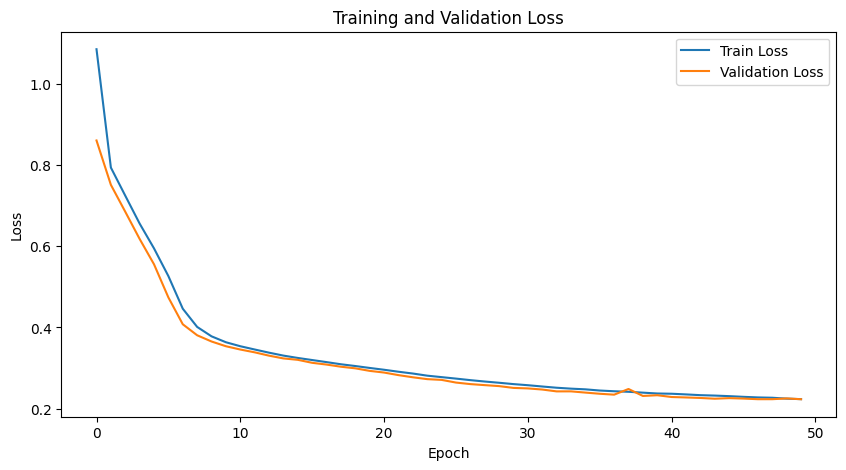

The function took 0.0795 seconds to execute.
The function took 0.0668 seconds to execute.
Validation Accuracy: 94.86%
Test Accuracy: 94.68%
Training Time: 24.26 seconds

Training with Optimizer: SGD+Momentum(0.1)
Epoch 10/50, Train Loss: 0.3741, Val Loss: 0.3641
Epoch 20/50, Train Loss: 0.3039, Val Loss: 0.2956
Epoch 30/50, Train Loss: 0.2665, Val Loss: 0.2573
Epoch 40/50, Train Loss: 0.2417, Val Loss: 0.2317
Epoch 50/50, Train Loss: 0.2230, Val Loss: 0.2170
Training completed in 25.87 seconds.


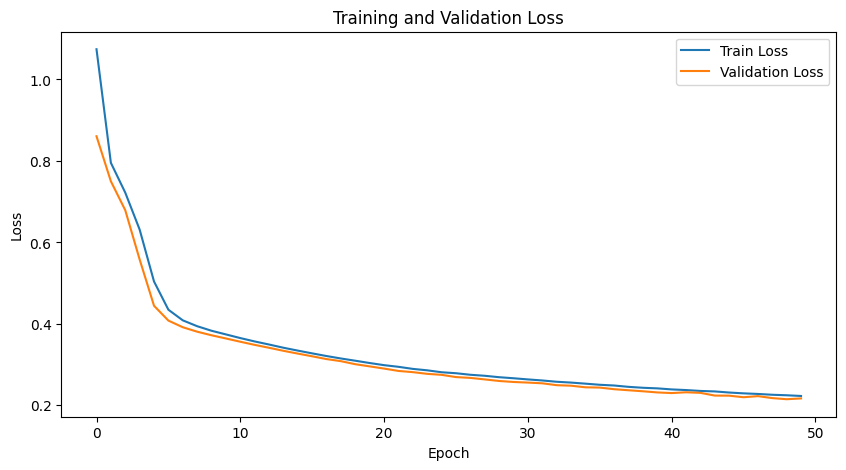

The function took 0.0760 seconds to execute.
The function took 0.0685 seconds to execute.
Validation Accuracy: 93.99%
Test Accuracy: 93.55%
Training Time: 26.04 seconds

Training with Optimizer: SGD+Momentum(0.5)
Epoch 10/50, Train Loss: 0.2959, Val Loss: 0.2882
Epoch 20/50, Train Loss: 0.2239, Val Loss: 0.2205
Epoch 30/50, Train Loss: 0.1691, Val Loss: 0.1723
Epoch 40/50, Train Loss: 0.1522, Val Loss: 0.1782
Epoch 50/50, Train Loss: 0.1421, Val Loss: 0.1386
Training completed in 25.83 seconds.


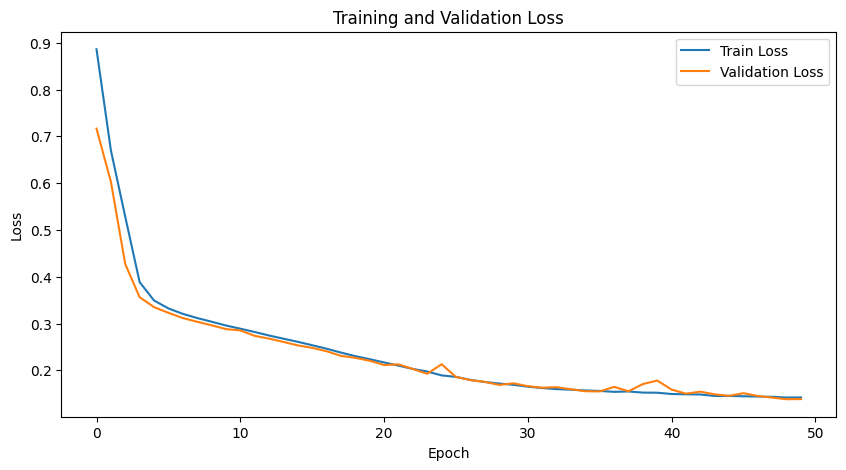

The function took 0.0852 seconds to execute.
The function took 0.0714 seconds to execute.
Validation Accuracy: 94.50%
Test Accuracy: 94.24%
Training Time: 26.01 seconds

Training with Optimizer: SGD+Momentum(0.9)
Epoch 10/50, Train Loss: 0.1790, Val Loss: 0.1717
Epoch 20/50, Train Loss: 0.1508, Val Loss: 0.1330
Epoch 30/50, Train Loss: 0.1287, Val Loss: 0.1266
Epoch 40/50, Train Loss: 0.1234, Val Loss: 0.1350
Epoch 50/50, Train Loss: 0.1096, Val Loss: 0.0991
Training completed in 26.40 seconds.


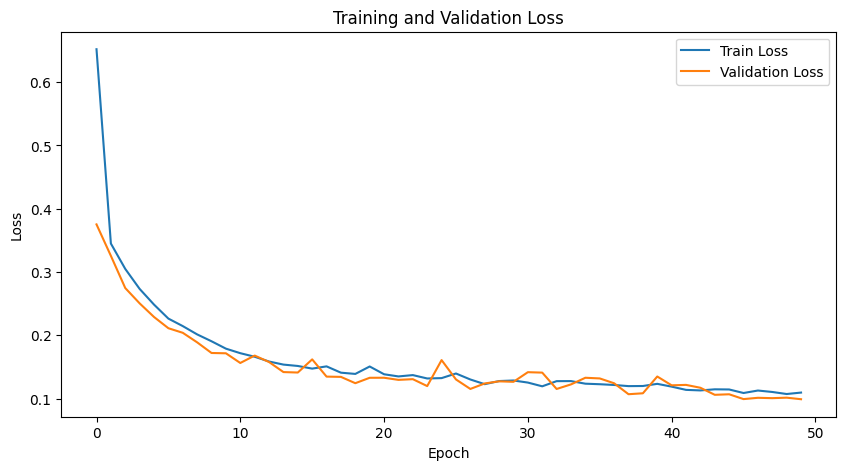

The function took 0.0792 seconds to execute.
The function took 0.0656 seconds to execute.
Validation Accuracy: 95.77%
Test Accuracy: 96.02%
Training Time: 26.57 seconds

Training with Optimizer: AdamW
Epoch 10/50, Train Loss: 0.1807, Val Loss: 0.1756
Epoch 20/50, Train Loss: 0.1374, Val Loss: 0.1384
Epoch 30/50, Train Loss: 0.1256, Val Loss: 0.1253
Epoch 40/50, Train Loss: 0.1188, Val Loss: 0.1203
Epoch 50/50, Train Loss: 0.1119, Val Loss: 0.1103
Training completed in 34.60 seconds.


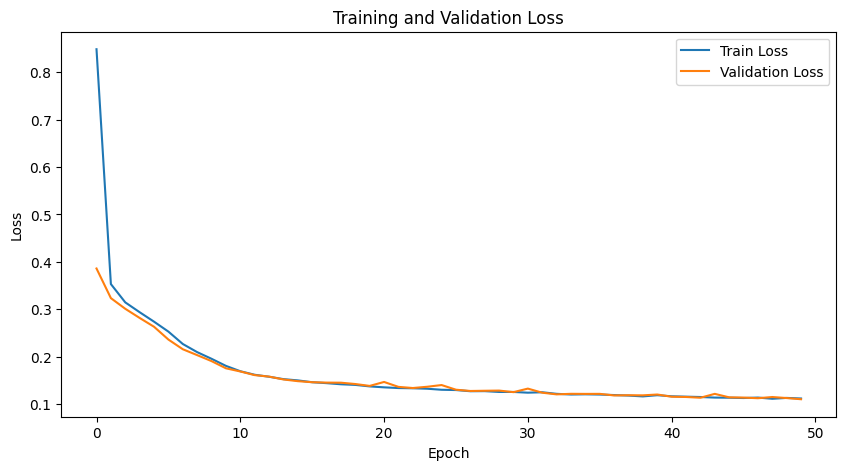

The function took 0.0783 seconds to execute.
The function took 0.0684 seconds to execute.
Validation Accuracy: 95.26%
Test Accuracy: 94.95%
Training Time: 34.77 seconds


In [43]:
optim_configs = [
    {'name': 'SGD', 'opt': lambda params: optim.SGD(params, lr=0.01)},
    {'name': 'SGD+Momentum(0.1)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.1)},
    {'name': 'SGD+Momentum(0.5)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.5)},
    {'name': 'SGD+Momentum(0.9)', 'opt': lambda params: optim.SGD(params, lr=0.01, momentum=0.9)},
    {'name': 'AdamW', 'opt': lambda params: optim.AdamW(params, lr=0.0005)}
]

optimizer_results = []

for config in optim_configs:
    print(f"\nTraining with Optimizer: {config['name']}")

    model = MulticlassNN(input_size, best_architecture, output_size)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = config['opt'](model.parameters())

    start_train_time = time.time()
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
    )
    train_time = time.time() - start_train_time

    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {train_time:.2f} seconds")

    optimizer_results.append({
        'optimizer': config['name'],
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_time_sec': train_time,
        'train_losses': train_losses,
        'val_losses': val_losses
    })


In [44]:
# Summarize results
print("\n--- Summary of Optimizer Function Impact ---")
for result in optimizer_results:
    print(f"Optimizer: {result['optimizer']}, "
          f"Validation Accuracy: {result['val_accuracy']:.2f}%, "
          f"Test Accuracy: {result['test_accuracy']:.2f}%")

best_optm = max(optimizer_results, key=lambda x: x['val_accuracy'])

print(f"\nBest Activation Function: {best_optm['optimizer']}, Val Accuracy: {best_optm['val_accuracy']:.2f}%, Test Accuracy: {best_optm['test_accuracy']:.2f}%")
best_optmimizer = best_optm['optimizer']


--- Summary of Optimizer Function Impact ---
Optimizer: SGD, Validation Accuracy: 94.86%, Test Accuracy: 94.68%
Optimizer: SGD+Momentum(0.1), Validation Accuracy: 93.99%, Test Accuracy: 93.55%
Optimizer: SGD+Momentum(0.5), Validation Accuracy: 94.50%, Test Accuracy: 94.24%
Optimizer: SGD+Momentum(0.9), Validation Accuracy: 95.77%, Test Accuracy: 96.02%
Optimizer: AdamW, Validation Accuracy: 95.26%, Test Accuracy: 94.95%

Best Activation Function: SGD+Momentum(0.9), Val Accuracy: 95.77%, Test Accuracy: 96.02%


## Task 5: Overfitting and Regularization

| **Hyperparameter**         | **Value**                      |
|----------------------------|--------------------------------|
| Layers                     | 6                              |
| Neurons per Layer          | {256, 128, 64, 32, 16}        |
| Activation                 | ReLU                           |
| Weight Initialization      | Default                        |
| Batch Size                 | 128                            |
| Loss Function              | Cross-Entropy                  |
| Optimizer                  | AdamW                          |
| Learning Rate              | 0.0005                         |
| Epochs & Early Stopping    | 50                             |
| Regularization             | None                           |


NOTICE: Each # Neurons per Layer describes how many neurons must be present in each
layer. For example: 1st layer 256, 2nd layer 128 etc.
- What do the losses look like? Is the model overfitting?

### Without Regularization

Epoch 10/50, Train Loss: 0.1433, Val Loss: 0.1334
Epoch 20/50, Train Loss: 0.1131, Val Loss: 0.1154
Epoch 30/50, Train Loss: 0.1001, Val Loss: 0.0948
Epoch 40/50, Train Loss: 0.0940, Val Loss: 0.0913
Epoch 50/50, Train Loss: 0.0903, Val Loss: 0.0893
Training completed in 33.51 seconds.


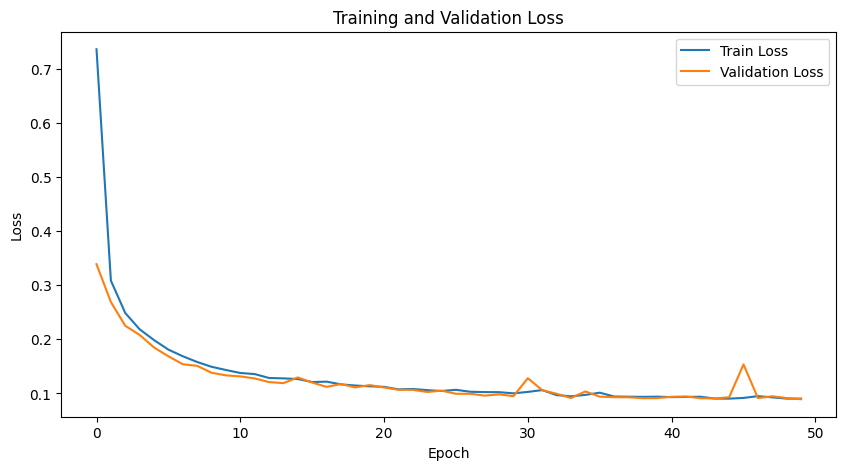

The function took 0.3420 seconds to execute.
The function took 0.1070 seconds to execute.
The function took 0.1214 seconds to execute.
Train Accuracy: 96.69%
Validation Accuracy: 95.26%
Test Accuracy: 96.95%


In [45]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

class MulticlassNN2(nn.Module):
    def __init__(self, input_size, output_size):
        super(MulticlassNN2, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x

model = MulticlassNN2(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

trained_model, train_losses, val_losses = training_loop_with_minibatch(
    model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
)

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracyt, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

### Dropout techinque
- What impact do the different normalization techniques have on validation and testing
performance?

Epoch 10/50, Train Loss: 0.2439, Val Loss: 0.2040
Epoch 20/50, Train Loss: 0.1882, Val Loss: 0.1532
Epoch 30/50, Train Loss: 0.1647, Val Loss: 0.1407
Epoch 40/50, Train Loss: 0.1587, Val Loss: 0.1294
Epoch 50/50, Train Loss: 0.1387, Val Loss: 0.1267
Training completed in 35.13 seconds.


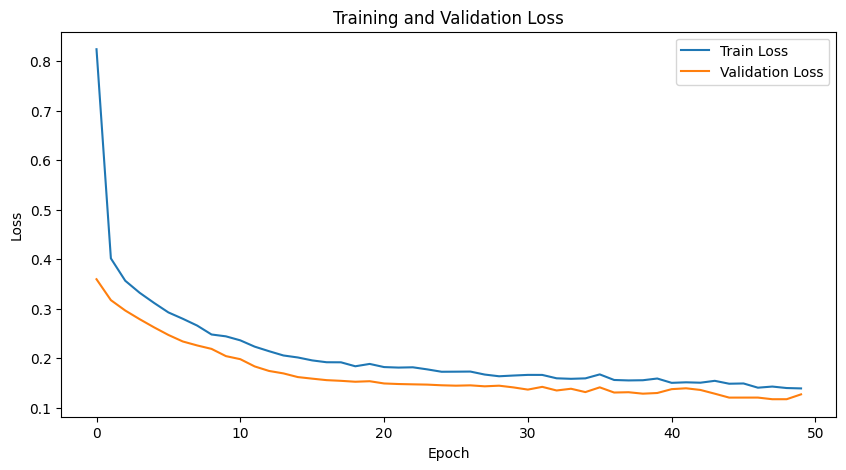

The function took 0.2334 seconds to execute.
The function took 0.0720 seconds to execute.
The function took 0.0722 seconds to execute.
Train Accuracy: 94.61%
Validation Accuracy: 95.26%
Test Accuracy: 94.30%


In [46]:
#4.5 (Normalization techniques (dropout))

class MulticlassDropoutNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MulticlassDropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.fc6(x)
        return x


model = MulticlassDropoutNN(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

trained_model, train_losses, val_losses = training_loop_with_minibatch(
    model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
)

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracyt, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

### Batch Normalization techinque
- What impact do the different normalization techniques have on validation and testing
performance?

Epoch 10/50, Train Loss: 0.2048, Val Loss: 0.1798
Epoch 20/50, Train Loss: 0.1674, Val Loss: 0.1511
Epoch 30/50, Train Loss: 0.1550, Val Loss: 0.1335
Epoch 40/50, Train Loss: 0.1496, Val Loss: 0.1318
Epoch 50/50, Train Loss: 0.1409, Val Loss: 0.1332
Training completed in 40.09 seconds.


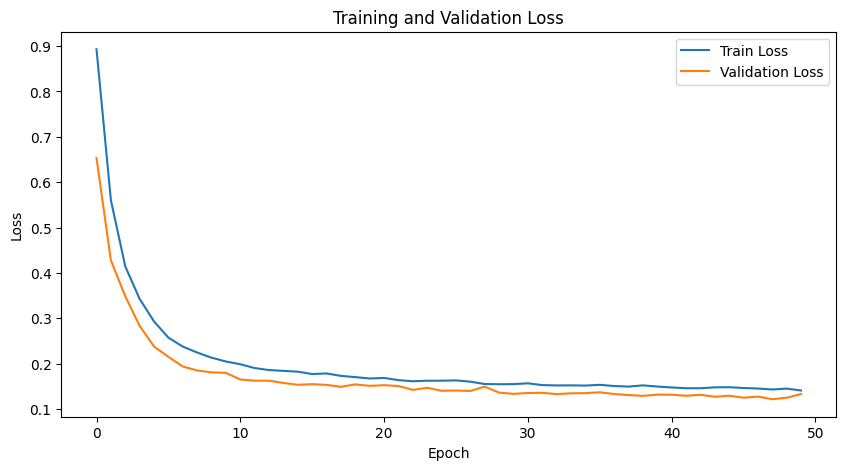

The function took 0.3303 seconds to execute.
The function took 0.1366 seconds to execute.
The function took 0.1371 seconds to execute.
Train Accuracy: 94.41%
Validation Accuracy: 95.26%
Test Accuracy: 94.15%


In [47]:
#4.5 (Normalization techniques (Batch))
class MulticlassNormalizedNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MulticlassNormalizedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch Norm after fc1
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)   # Batch Norm after fc3
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 16)
        self.bn5 = nn.BatchNorm1d(16)   # Batch Norm after fc5
        self.fc6 = nn.Linear(16, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.relu(self.fc4(x))
        x = self.relu(self.bn5(self.fc5(x)))
        x = self.fc6(x)
        return x


model = MulticlassNormalizedNN(input_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

trained_model, train_losses, val_losses = training_loop_with_minibatch(
    model, train_loader, val_loader, device, optimizer, criterion, num_epoch = 50, patience = 20
)

train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
val_accuracyt, val_labels, val_preds = testing_model(model, val_loader, device)
test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

### Weight Decay in AdamW

Training with weight_decay = 0.0
Epoch 10/50, Train Loss: 0.1976, Val Loss: 0.1711
Epoch 20/50, Train Loss: 0.1664, Val Loss: 0.1523
Epoch 30/50, Train Loss: 0.1549, Val Loss: 0.1379
Epoch 40/50, Train Loss: 0.1502, Val Loss: 0.1359
Epoch 50/50, Train Loss: 0.1435, Val Loss: 0.1304
Training completed in 41.71 seconds.


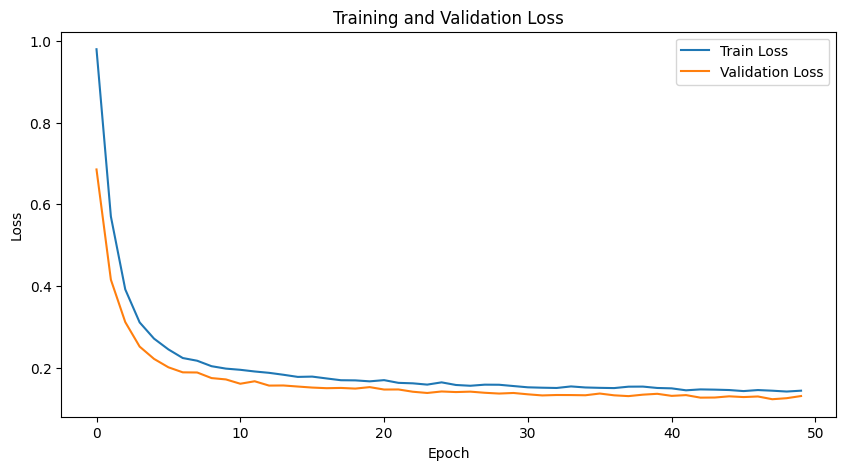

The function took 0.2444 seconds to execute.
The function took 0.0853 seconds to execute.
The function took 0.0824 seconds to execute.
Train Accuracy: 94.35%
Validation Accuracy: 94.37%
Test Accuracy: 94.21%
--------------------------------------------------
Training with weight_decay = 0.01
Epoch 10/50, Train Loss: 0.2017, Val Loss: 0.1720
Epoch 20/50, Train Loss: 0.1685, Val Loss: 0.1499
Epoch 30/50, Train Loss: 0.1563, Val Loss: 0.1404
Epoch 40/50, Train Loss: 0.1508, Val Loss: 0.1306
Epoch 50/50, Train Loss: 0.1447, Val Loss: 0.1265
Training completed in 40.78 seconds.


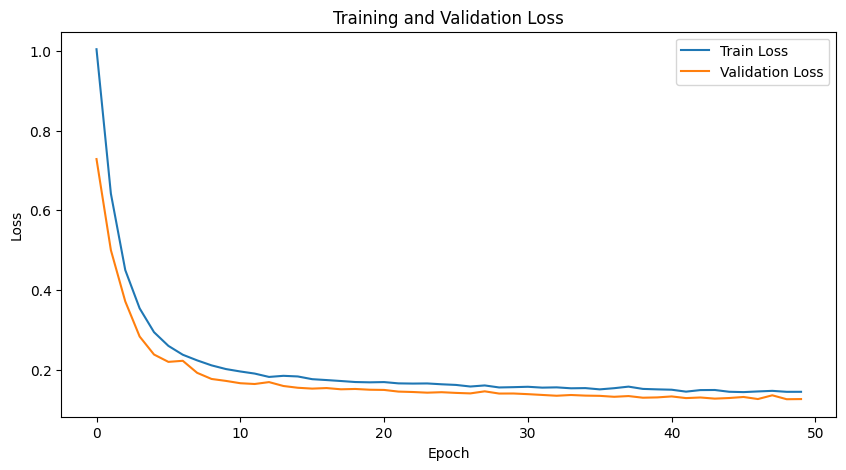

The function took 0.2705 seconds to execute.
The function took 0.0836 seconds to execute.
The function took 0.0960 seconds to execute.
Train Accuracy: 94.47%
Validation Accuracy: 94.33%
Test Accuracy: 94.17%
--------------------------------------------------
Training with weight_decay = 0.02
Epoch 10/50, Train Loss: 0.1976, Val Loss: 0.1762
Epoch 20/50, Train Loss: 0.1675, Val Loss: 0.1485
Epoch 30/50, Train Loss: 0.1557, Val Loss: 0.1440
Epoch 40/50, Train Loss: 0.1505, Val Loss: 0.1337
Epoch 50/50, Train Loss: 0.1437, Val Loss: 0.1288
Training completed in 40.10 seconds.


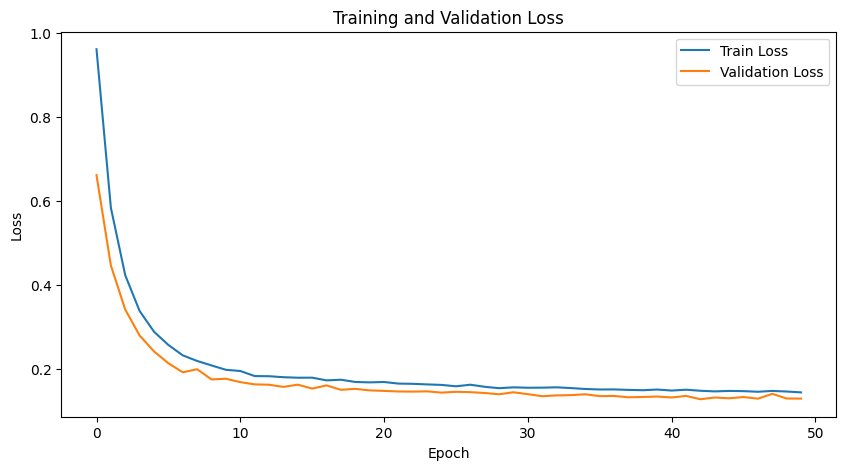

The function took 0.2546 seconds to execute.
The function took 0.0770 seconds to execute.
The function took 0.0901 seconds to execute.
Train Accuracy: 94.53%
Validation Accuracy: 94.39%
Test Accuracy: 94.21%
--------------------------------------------------
Training with weight_decay = 0.1
Epoch 10/50, Train Loss: 0.2013, Val Loss: 0.1749
Epoch 20/50, Train Loss: 0.1697, Val Loss: 0.1528
Epoch 30/50, Train Loss: 0.1575, Val Loss: 0.1395
Epoch 40/50, Train Loss: 0.1471, Val Loss: 0.1386
Epoch 50/50, Train Loss: 0.1420, Val Loss: 0.1253
Training completed in 40.85 seconds.


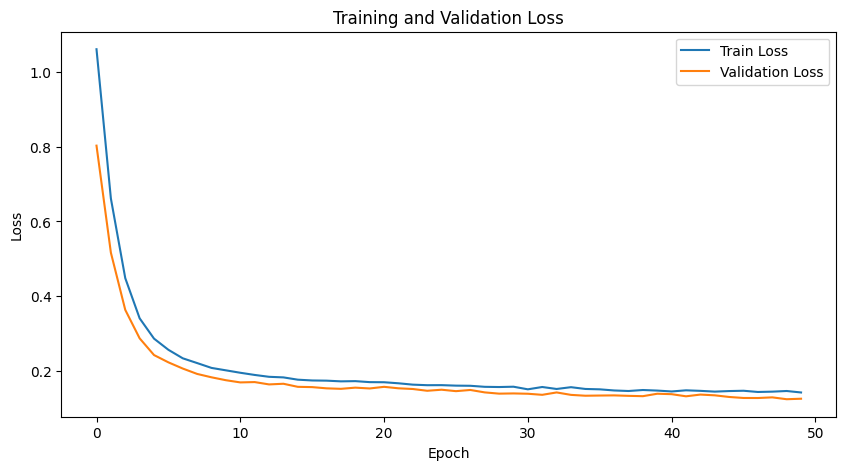

The function took 0.2963 seconds to execute.
The function took 0.0830 seconds to execute.
The function took 0.0804 seconds to execute.
Train Accuracy: 94.60%
Validation Accuracy: 94.46%
Test Accuracy: 94.39%
--------------------------------------------------


In [48]:
weight_decay_values = [0.0, 0.01, 0.02, 0.1]

results = []  # To store results for each weight decay value

for weight_decay in weight_decay_values:
    print(f"Training with weight_decay = {weight_decay}")

    # Initialize the model, criterion, and optimizer
    model = MulticlassNormalizedNN(input_size, output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=weight_decay)

    # Train the model
    trained_model, train_losses, val_losses = training_loop_with_minibatch(
        model, train_loader, val_loader, device, optimizer, criterion, num_epoch=50, patience=20
    )

    # Test the model
    train_accuracy, train_labels, train_preds = testing_model(model, train_loader, device)
    val_accuracy, val_labels, val_preds = testing_model(model, val_loader, device)
    test_accuracy, test_labels, test_preds = testing_model(model, test_loader, device)

    # Store results
    results.append({
        'weight_decay': weight_decay,
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    })

    # Print results for this weight decay value
    print(f"Train Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Accuracy: {val_accuracy:.2f}%")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print("-" * 50)


In [49]:
# Summarize the results
print("Summary of Results:")
for res in results:
    print(f"Weight Decay: {res['weight_decay']}, "
          f"Train Acc: {res['train_accuracy']:.2f}%, "
          f"Val Acc: {res['val_accuracy']:.2f}%, "
          f"Test Acc: {res['test_accuracy']:.2f}%")

best_weight_decay = max(results, key=lambda x: x['val_accuracy'])

print(f"\nBest weight decay: {best_weight_decay['weight_decay']}, Train Accuracy: {best_weight_decay['train_accuracy']:.2f}%, Val Accuracy: {best_weight_decay['val_accuracy']:.2f}%, Test Accuracy: {best_weight_decay['test_accuracy']:.2f}%")

Summary of Results:
Weight Decay: 0.0, Train Acc: 94.35%, Val Acc: 94.37%, Test Acc: 94.21%
Weight Decay: 0.01, Train Acc: 94.47%, Val Acc: 94.33%, Test Acc: 94.17%
Weight Decay: 0.02, Train Acc: 94.53%, Val Acc: 94.39%, Test Acc: 94.21%
Weight Decay: 0.1, Train Acc: 94.60%, Val Acc: 94.46%, Test Acc: 94.39%

Best weight decay: 0.1, Train Accuracy: 94.60%, Val Accuracy: 94.46%, Test Accuracy: 94.39%
